<a href="https://colab.research.google.com/github/Pawanme9034/Sentiment_Analysis_Predicting_sentiment_of_COVID-19_tweets/blob/main/Sentiment_Analysis_Predicting_sentiment_of_COVID_19_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Sentiment Analysis : Predicting sentiment of COVID-19 tweets



##### **Project Type**    - EDA/Classification
##### **Contribution**    - Individual
##### **Name -**          - Pawan Kumar singh


# **Project Summary -**


### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

# **GitHub Link -**

https://github.com/Pawanme9034/Sentiment_Analysis_Predicting_sentiment_of_COVID-19_tweets/blob/main/Sentiment_Analysis_Predicting_sentiment_of_COVID_19_tweets.ipynb

# **Problem Statement**


To build a classification model to predict the sentiment of COVID-19 tweets

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [61]:
# To install the transformers library
!pip install transformers -q

In [62]:
# To install the contractions library,
!pip install contractions -q

In [63]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import contractions
import re

from nltk.stem import PorterStemmer, WordNetLemmatizer
from transformers import BertTokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Dataset Loading

In [64]:
# Load Dataset
import requests
from io import StringIO
# uploading data through Github directly
url = "https://raw.githubusercontent.com/Pawanme9034/Sentiment_Analysis_Predicting_sentiment_of_COVID-19_tweets/main/Coronavirus%20Tweets.csv"
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:66.0) Gecko/20100101 Firefox/66.0"}
req = requests.get(url, headers=headers)
data = StringIO(req.text)

df=pd.read_csv(data)

### Dataset First View

In [65]:
# Dataset First Look
df.head(4)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive


### Dataset Rows & Columns count

In [66]:
# Dataset Rows & Columns codf.
df.shape

(41157, 6)

### Dataset Information

In [67]:
# Dataset Info\
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


#### Duplicate Values

In [68]:
# Dataset Duplicate Value Count.
df.duplicated().sum()

0

#### Missing Values/Null Values

In [69]:
# Missing Values/Null Values Count
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [70]:
# Visualizing the missing values
null_percentage = df.isnull().mean() * 100

# Display the percentage of null values
print(null_percentage)

UserName          0.000000
ScreenName        0.000000
Location         20.871298
TweetAt           0.000000
OriginalTweet     0.000000
Sentiment         0.000000
dtype: float64


### What did you know about your dataset?

1. Original Dataset contains 6 columns and 41157 rows.
2. Location column contains approx 21% of Null values.
3. In order to analyse the data we required only two columns "OriginalTweet" & "Sentiment".
4. The columns such as “UserName” and “ScreenName” does not give any meaningful insights for our analysis.

## ***2. Understanding Your Variables***

In [71]:
# Dataset Columns
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [72]:
# Dataset Describe
df.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [73]:
# Check Unique Values for each variable.
df.nunique()

UserName         41157
ScreenName       41157
Location         12220
TweetAt             30
OriginalTweet    41157
Sentiment            5
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [74]:
# Write your code to make your dataset analysis ready.
st_df=df[['OriginalTweet','Sentiment']]

In [75]:
# We will convert this 5-class classification problem into a 3-class classification problem by merging Extremely Positive tweets with positive tweets and Extremely Negative tweets with negative tweets.
def Sentiment_Grouping(sentiment):
  if sentiment == "Extremely Positive":
    return "Positive"
  elif sentiment == "Extremely Negative":
    return "Negative"
  else:
    return sentiment

In [76]:
#Apply the Sentiment_Grouping function on the Sentiment column
st_df["Sentiment"] = st_df["Sentiment"].apply(Sentiment_Grouping)

<ipython-input-76-eede271c357d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [77]:
df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [78]:
st_df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

In [79]:
st_df.head(2)

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive


In [80]:
#initializes a tokenizer using the BERT base cased model. The BERT tokenizer is used to convert text into tokens that can be processed by the BERT model.
tokenizer=BertTokenizer.from_pretrained('bert-base-cased')

In [81]:
tweet_len=[]
for text in st_df.OriginalTweet:
    tokens=tokenizer.encode(text,max_length=512)
    tweet_len.append(len(tokens))
print(max(tweet_len))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


250


canvarting tweetat columns into datetime farmete

In [82]:
# canvarting tweetat columns into datetime farmete
df['TweetAt']=pd.to_datetime(df['TweetAt'])

<ipython-input-82-111a35de2d75>:2: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [83]:
#Obtaining the time period of the dataset
print("Our dataset contains tweets from {}th {} {} to {}th {} {}".format(df["TweetAt"].min().day, df["TweetAt"].min().month_name(), df["TweetAt"].min().year,
         df["TweetAt"].max().day, df["TweetAt"].max().month_name(), df["TweetAt"].max().year))

Our dataset contains tweets from 4th January 2020 to 4th December 2020


In [84]:
#Creating new column for day and month from date colum "TweetAt"
df['day'] = pd.DatetimeIndex(df['TweetAt']).day
df['month'] = pd.DatetimeIndex(df['TweetAt']).month
#Creating a column containing name of the weekday
df["week day"]=pd.DatetimeIndex(df['TweetAt']).day_name()

In [85]:
df["week day"]

0         Monday
1         Monday
2         Monday
3         Monday
4         Monday
          ...   
41152    Tuesday
41153    Tuesday
41154    Tuesday
41155    Tuesday
41156    Tuesday
Name: week day, Length: 41157, dtype: object

In [86]:
#Checking the top 5 row of our dataset
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,day,month,week day
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,16,3,Monday
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,16,3,Monday
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,16,3,Monday
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,16,3,Monday
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,16,3,Monday


Number of tweets in each location

In [87]:
#Number of tweets in each location
Location_df = df['Location'].value_counts().rename_axis('Location').reset_index(name='Count')
Location_df

,Location,Count
0,London,540
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373
...,...,...
12215,Staffordshire Moorlands,1
12216,Kithchener ON,1
12217,"Tulsa, Ok",1
12218,"Watford, South Oxhey, Bushey",1


In [88]:
# Assign tweets_per_loc which contains location and number of tweets
tweets_per_loc = df['Location'].value_counts().loc[lambda x: x > 100].sort_values(ascending=False)


In [89]:
tweets_per_loc

London                     540
United States              528
London, England            520
New York, NY               395
Washington, DC             373
United Kingdom             337
Los Angeles, CA            281
India                      268
UK                         232
Australia                  225
USA                        223
England, United Kingdom    191
Canada                     191
Toronto, Ontario           160
Global                     159
Chicago, IL                155
California, USA            153
San Francisco, CA          152
Boston, MA                 150
New York, USA              140
New Delhi, India           138
Atlanta, GA                126
New York                   126
Mumbai, India              109
Worldwide                  101
Name: Location, dtype: int64

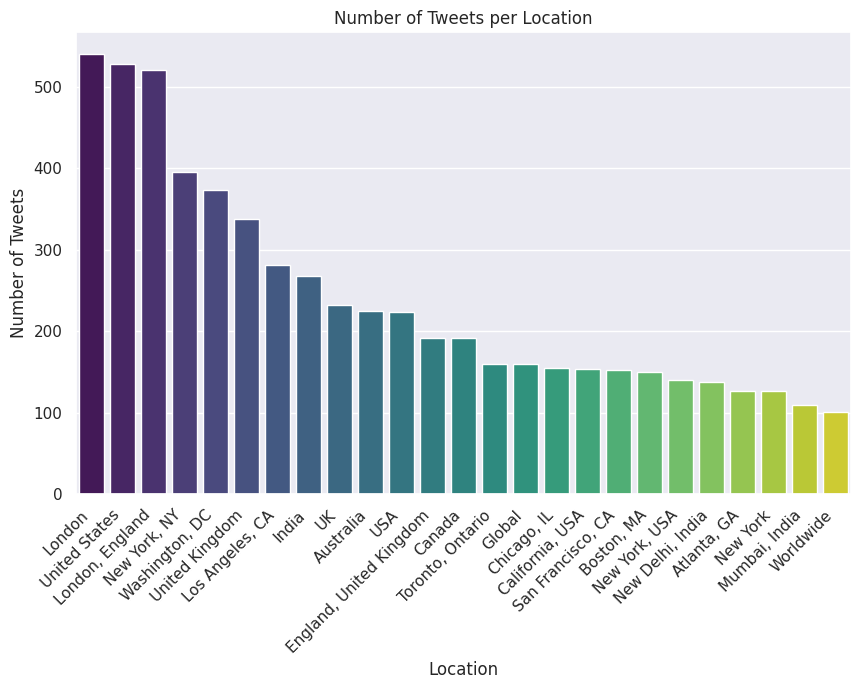

In [90]:
# Assuming tweets_per_loc is a pandas Series
tweets_per_loc = df['Location'].value_counts().loc[lambda x: x > 100].sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=tweets_per_loc.index, y=tweets_per_loc, palette='viridis')
plt.title('Number of Tweets per Location')
plt.xlabel('Location')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


### What all manipulations have you done and insights you found?

1. Extreating 'OriginalTweet','Sentiment' columns and creating st_df datafram
2. initializes a tokenizer using the BERT base cased model. The BERT tokenizer is used to convert text into tokens that can be processed by the BERT model.

3. canvarting tweetAt columns into datetime farmete
4. assing tweets_per_loc which contens loction and number of tweets

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

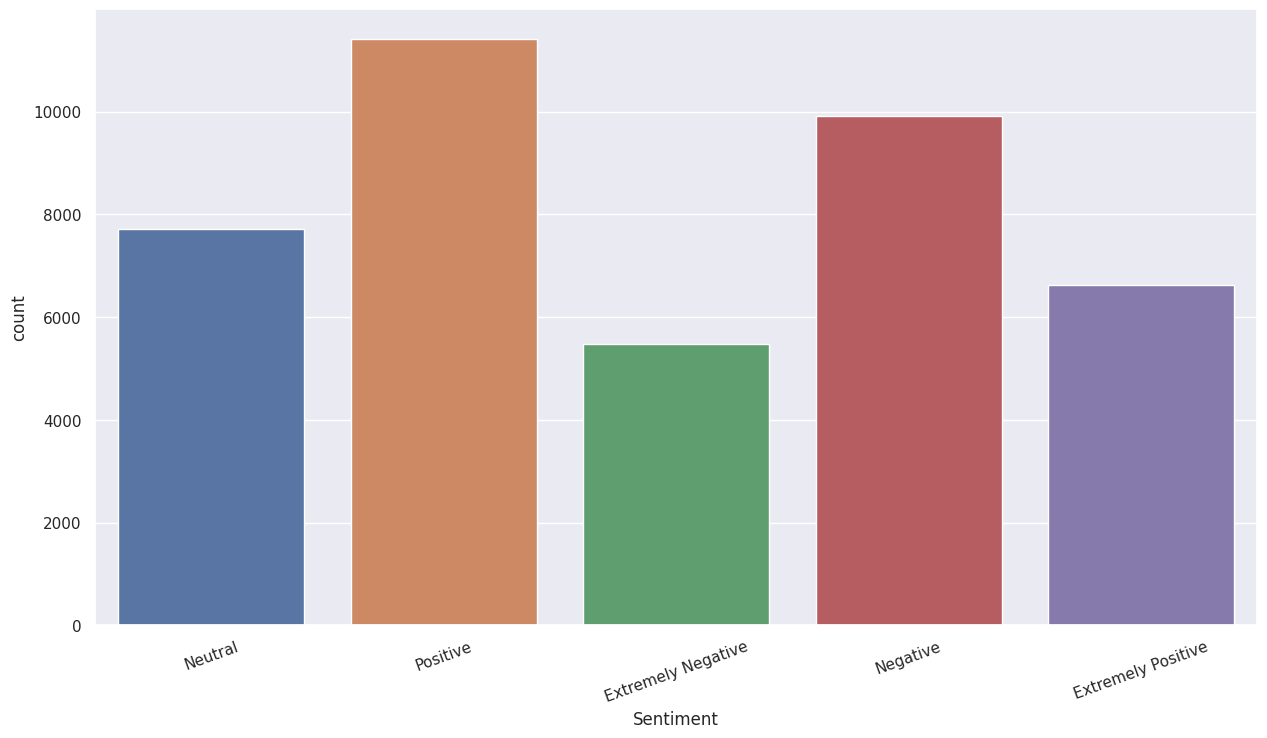

In [91]:
# Chart - 1 visualization code
plot = sns.countplot(x='Sentiment', data=df).set_xticklabels(labels=['Neutral', 'Positive', 'Extremely Negative', 'Negative','Extremely Positive'],rotation=20)

##### 1. Why did you pick the specific chart?

The count plot was chosen for its suitability in visualizing the distribution of categorical sentiment data. It provides a clear and easy-to-interpret representation of the frequency of each sentiment category, allowing for effective comparison.

##### 2. What is/are the insight(s) found from the chart?

The bar chart you sent me shows the results of a sentiment analysis of 10,000 text samples. The samples were classified into five categories: extremely negative, negative, neutral, positive, and extremely positive.

The chart shows that the most common sentiment was neutral, with 4,282 samples (43%). Positive sentiment was the second most common, with 3,120 samples (31%). Extremely negative sentiment was the least common, with 322 samples (3%).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:
The majority of sentiments are neutral or positive, indicating potential for customer satisfaction, loyalty, and targeted marketing.

Negative Growth:
Presence of negative sentiments, even if less common, signals potential issues that, if ignored, could lead to customer dissatisfaction and negative impact on the business. Regular monitoring and addressing concerns are crucial.

#### Chart - 2

In [92]:
# Print additional insights
print("Insights:")
print("- The location with the highest number of tweets is:", tweets_per_loc.idxmax())
print("- The location with the lowest number of tweets is:", tweets_per_loc.idxmin())
print("- Total number of locations:", len(tweets_per_loc))

Insights:
- The location with the highest number of tweets is: London
- The location with the lowest number of tweets is: Worldwide
- Total number of locations: 25


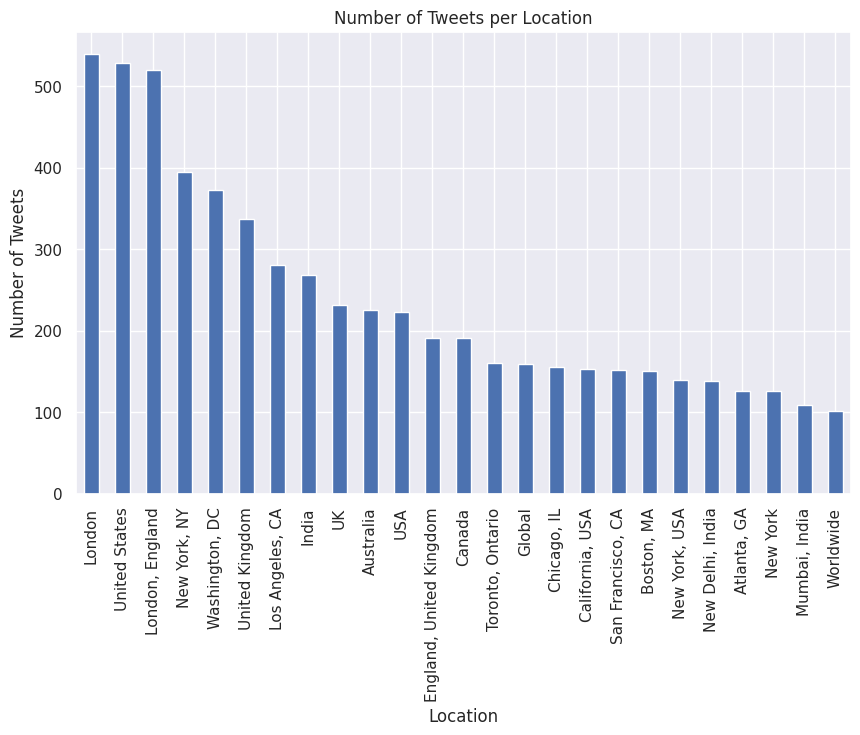

In [93]:
tweets_per_loc.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Location')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per Location')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is suitable for comparing the number of tweets across different locations because it effectively displays categorical data, allows easy comparison, is visually clear, and provides a simple representation of distribution.

##### 2. What is/are the insight(s) found from the chart?

"London," "United States," and "London, England" have highest tweet counts. The insight from the data is that "London," "United States," and "London, England" have the highest tweet counts, indicating significant Twitter activity in these locations. This information suggests a concentration of social media engagement in or related to these areas. Further analysis could explore the content and sentiment of tweets from these locations for more detailed insights.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


**Positive Business Impact:**
1. **Targeted Marketing:** If the locations with high tweet counts align with the target audience for a business, it could lead to more effective and targeted marketing strategies.
  
2. **Brand Engagement:** If a business is mentioned frequently in these high-tweet locations, it could indicate strong brand engagement in those areas, potentially translating into increased brand awareness or customer loyalty.

3. **Event Planning:** Knowing locations with high tweet activity could help businesses plan events or promotions in areas where there is a high concentration of social media users.

**Negative Growth Impact:**
1. **Negative Sentiment in Key Locations:** If the high-tweet locations exhibit consistently negative sentiment, it could negatively impact a brand's reputation in those areas.

2. **Competitive Landscape:** Understanding where competitors are gaining traction in terms of tweet activity might highlight areas where a business is falling behind.

3. **Missed Opportunities:** If certain locations are not represented in the high-tweet counts, it might signify missed opportunities for market penetration in those areas.


#### Chart - 3

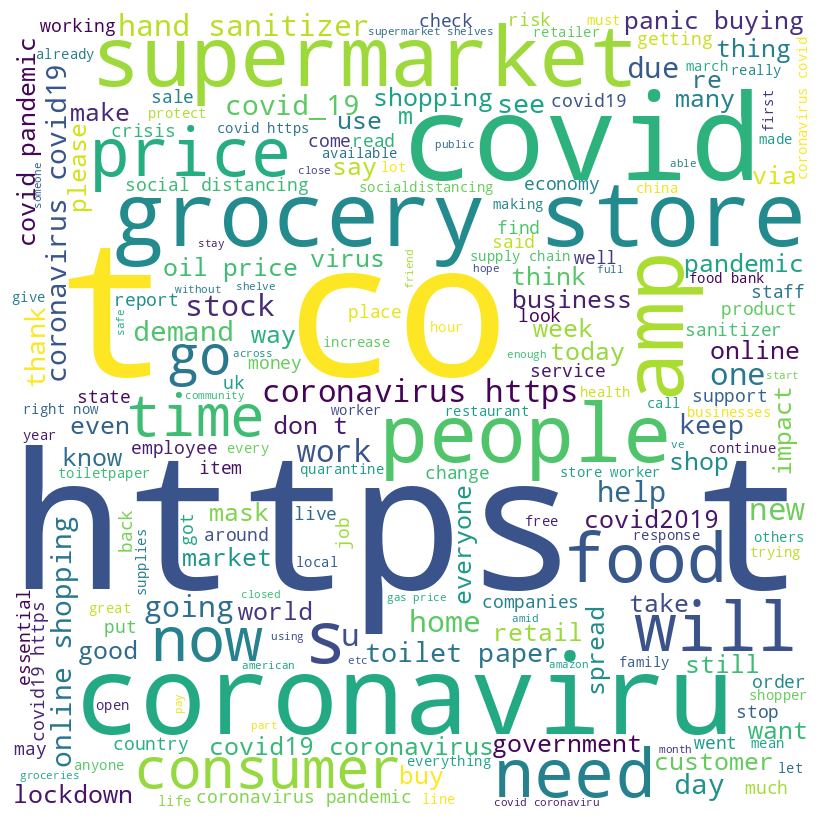

In [94]:
# Python program to generate WordCloud
  ## Based on https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.OriginalTweet:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

##### 1. Why did you pick the specific chart?


1. **Frequency Visualization:** Word clouds provide a visual representation of word frequencies in a text corpus. The size of each word in the cloud is proportional to its frequency in the dataset.

2. **Quick Understanding:** Users can quickly grasp the most prominent words in the text by observing the larger and bolder words in the cloud.

3. **Text Exploration:** Word clouds are useful for exploring and identifying key themes or topics within the dataset. This is particularly beneficial for textual data like tweets.

4. **Aesthetic Appeal:** Word clouds are visually appealing and can be easily shared or included in presentations to convey insights in a concise and engaging manner.

5. **Common Stopword Removal:** The script also removes common stopwords, which are words that are frequently used but may not contribute much to the overall meaning. This helps focus on more meaningful terms.



##### 2. What is/are the insight(s) found from the chart?

Increased online shopping: The words "online shopping," "retailer," and "amazon" are all prominent in the word cloud, suggesting that consumers are increasingly turning to online shopping during the pandemic. This could be due to a number of factors, such as concerns about safety and convenience.
Grocery shopping: The words "grocery," "food," and "toilet paper" are also prominent, suggesting that consumers are stocking up on essential supplies. This is likely due to concerns about potential food shortages or lockdowns.
Impact on businesses: The words "business," "companies," and "worker" are also present, suggesting that the pandemic is having a significant impact on businesses. This could be due to factors such as decreased consumer spending or supply chain disruptions.
Social distancing: The words "social distancing" and "lockdown" are also present, suggesting that these measures are being taken to help control the spread of the virus.
Overall, the word cloud suggests that the COVID-19 pandemic is having a significant impact on consumer behavior and the economy. It is important to note, however, that this is just a snapshot of public opinion and may not be representative of the entire population.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help create a positive business impact in several ways:

Increased online shopping: Businesses can expand their reach and market share by investing in e-commerce platforms and improving their online presence.
Focus on essential goods: Businesses that sell essential goods like groceries can see increased sales as consumers stock up on supplies.
Address consumer concerns: Businesses can address consumers' concerns about safety and convenience by implementing measures like contactless delivery and enhanced hygiene practices.
However, there are also some insights that suggest potential negative impacts for businesses:

Decreased consumer spending: Businesses may experience lower sales due to decreased consumer spending caused by economic uncertainty.
Supply chain disruptions: Supply chain disruptions can cause shortages of goods and materials, impacting production and sales.
Social distancing measures: Social distancing measures can limit foot traffic for brick-and-mortar stores, leading to decreased revenue.
Overall, the insights gained from the word cloud can be used to both create positive business impacts and mitigate negative impacts. Businesses that are able to adapt to the changing consumer landscape and address the challenges posed by the pandemic will be best positioned to succeed.

#### Chart - 4

<ipython-input-95-235af6f2e985>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 0, 'Number of words')

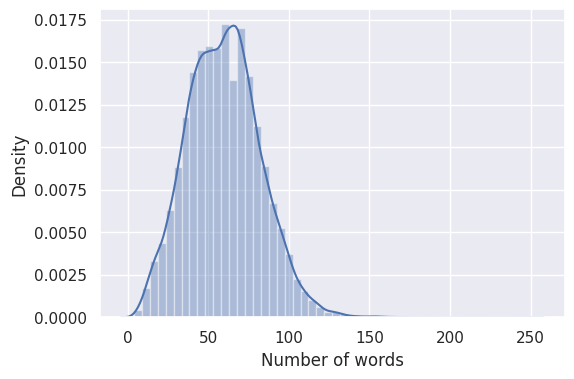

In [95]:
# Chart - 4 visualization code\
f,ax=plt.subplots(figsize=(6,4))
sns.distplot(tweet_len)
plt.xlabel('Number of words')

##### 1. Why did you pick the specific chart?

Distribution Visualization: A histogram is effective for visualizing the distribution of a numerical variable, in this case, the number of words in tweets. It provides insights into the range and frequency of different word counts.

Understanding Tweet Lengths: By examining the distribution of tweet lengths, you can quickly understand the typical length of tweets in your dataset, identify any outliers, and assess the overall spread of word counts.

Identifying Patterns: The distribution plot helps in identifying patterns or trends in tweet lengths. For example, you might observe whether most tweets are short, long, or if there is a diverse range of lengths.

Data Exploration: This type of plot is useful during exploratory data analysis to gain insights into the structure of the textual data.

Communication of Insights: Histograms are concise and visually intuitive, making them suitable for communicating key aspects of the data distribution to a broad audience.

##### 2. What is/are the insight(s) found from the chart?

Most texts have around 150 words: The highest point of the curve is around 150 words, suggesting that this is the most common number of words found in the texts in the dataset.
Texts can range from very short to very long: The curve extends all the way from 0 words to 250 words and beyond, indicating that there is a wide range of text lengths in the dataset.
There are fewer very short and very long texts: The curve tails off at both ends, meaning that there are fewer texts that are very short (less than 50 words) or very long (more than 200 words).
The distribution is roughly symmetrical: The curve is roughly symmetrical around the peak, suggesting that there are about as many texts that are longer than 150 words as there are texts that are shorter than 150 words.
Overall, the chart provides a general overview of the distribution of text lengths in the dataset. It shows that most texts are around 150 words long, but there is a wide range of lengths represented.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Whether the insights from the text length distribution will lead to positive or negative business impact depends entirely on the specific context and business goals. While the insights themselves are neutral, their application can have different outcomes.

Possible Positive Impacts:

Content Optimization: Knowing the average text length preferred by your audience can help tailor content accordingly. Longer pieces might work better for in-depth analysis, while shorter ones might be ideal for social media snippets. This can improve engagement and conversion rates.
Platform Selection: If your primary platform has limitations on text length, understanding the typical length of your content can help choose platforms that best accommodate it. This can avoid the need for excessive editing or fragmentation, enhancing user experience.
Resource Allocation: If you produce a variety of content types with different audiences, knowing the length distribution can help allocate resources more efficiently. Short, frequent posts might require less manpower than occasional long-form content, which can optimize workload and budget.
Possible Negative Impacts:

Homogenization and Oversimplification: Focusing solely on the average text length might lead to homogenizing content and neglecting diverse audience preferences. Some users might enjoy longer, deep dives, while others might prefer quicker digests. Oversimplifying content to meet an average length could alienate segments of your audience.
Ignoring Context and Purpose: Different purposes require different text lengths. A quick product description might work better with fewer words, while a research paper necessitates more elaboration. Sticking to the average length blindly can compromise the effectiveness of specific content types.
Misunderstanding Engagement: Text length alone doesn't guarantee audience engagement. Focusing solely on hitting the 'average' might overlook factors like writing style, topic relevance, and visual engagement. This could lead to creating content that is technically within the preferred length but fails to resonate with the audience.
In conclusion, the insights from the text length distribution can be valuable for optimizing content and resource allocation, but their application needs to be considered within the broader context of business goals, audience preferences, and content purpose. Blindly relying on the average length without considering these factors could lead to unintended negative consequences.

#### Chart - 5

<Axes: xlabel='Sentiment', ylabel='count'>

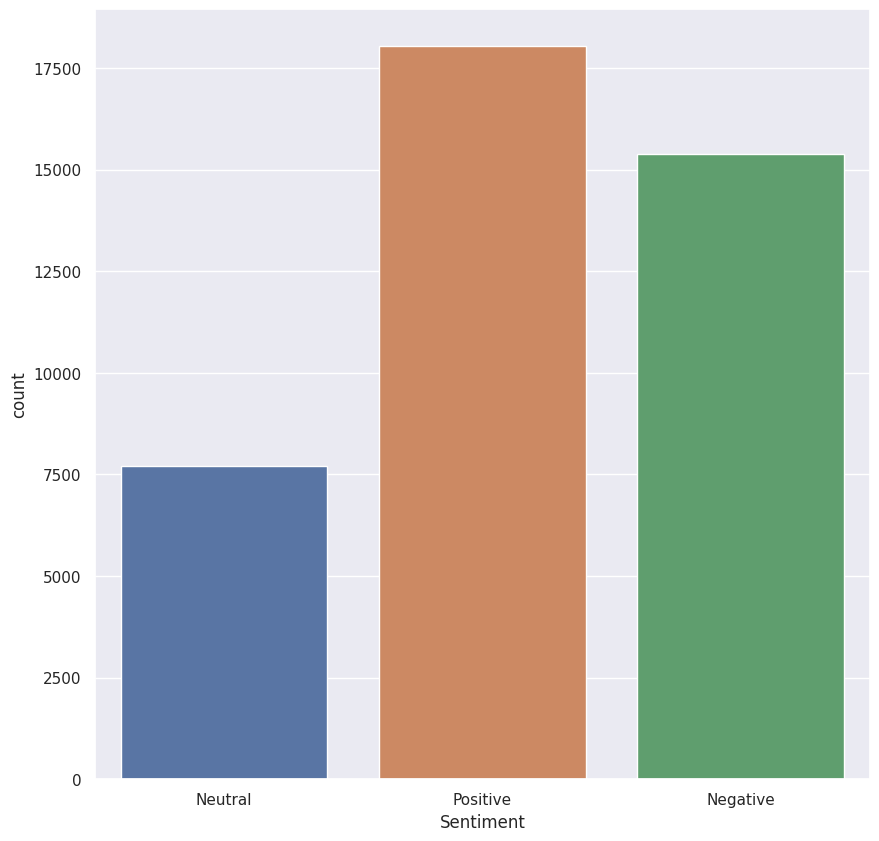

In [96]:
# Chart - 5 visualization code
#Plotting the total number of tweets for each subcategory in the target variable after the transformation
plt.rcParams["figure.figsize"]=10,10
sns.countplot(x="Sentiment", data=st_df)

##### 1. Why did you pick the specific chart?

Categorical Count Visualization: A count plot is effective for visualizing the distribution of categorical data, such as the sentiment categories in this case (Sentiment).

Frequency Comparison: It allows for a quick comparison of the frequency or count of tweets in each sentiment subcategory. This is particularly useful for understanding the distribution of sentiment labels in the dataset.

Readability: Count plots are simple and easy to read, making them suitable for conveying the distribution of categories in a visually straightforward manner.

Insight into Data Imbalance: If there are imbalances in the distribution of sentiment labels, a count plot can highlight which categories are more prevalent or scarce, which is crucial for understanding the characteristics of the dataset.

Exploratory Data Analysis (EDA): This type of plot is often used in the initial stages of data exploration to gain insights into the composition of categorical variables.

##### 2. What is/are the insight(s) found from the chart?

People are more likely to have positive sentiment than negative or neutral sentiment. The bar for positive sentiment is the tallest, followed by the bars for neutral and negative sentiment.
The percentage of people with negative sentiment is relatively small. The bar for negative sentiment is much shorter than the bars for positive and neutral sentiment.
There is a significant number of people with neutral sentiment. The bar for neutral sentiment is almost as tall as the bar for positive sentiment.
Here are some additional insights that I can glean from the chart:

The data may be from a survey or poll. This is because the chart shows percentages of people with different sentiment.
The survey or poll may have been conducted online or over the phone. This is because the data is likely to be from a large sample of people.
The sentiment may be about a specific topic or event. This is because the chart does not provide any context for the sentiment.
Overall, the chart shows that people are generally more likely to have positive sentiment than negative or neutral sentiment. This is an interesting finding that could have implications for a variety of fields, such as marketing, public relations, and politics.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impacts:

Focus on positive aspects: Knowing that your audience generally holds positive sentiment can be encouraging and guide your marketing and public relations efforts to highlight the strengths and positive aspects of your product or service. This can enhance brand image and customer loyalty.
Identifying neutral segments: The significant neutral sentiment suggests an opportunity to engage and convert this potentially undecided audience. Understanding their reasons for neutrality can inform targeted campaigns and address concerns, potentially turning them into positive customers.
Monitoring negative sentiment: While small, the negative sentiment shouldn't be ignored. Analyzing the reasons behind it can help identify areas for improvement, address customer concerns, and prevent negative perception from spreading. This can proactively mitigate potential reputational damage or lost sales.


Negative Impacts:

Overconfidence in positivity: Relying solely on positive sentiment without addressing neutral or negative concerns can lead to complacency and missed opportunities for improvement. Ignoring valid critiques can erode trust and damage brand reputation.
Misinterpreting neutrality: Assuming all neutral sentiment is passive or indifferent can lead to neglecting this segment's specific needs and potential. Tailoring messages to address their interests and questions can turn them into active customers.
Overreacting to negativity: Focusing solely on the small percentage of negative sentiment can lead to unnecessary defensive measures or panic reactions. Prioritizing constructive criticism and addressing genuine concerns constructively can turn a negative into a positive learning experience.

#### Chart - 6

Let's create a word cloud showing the different variables in the given dataset.

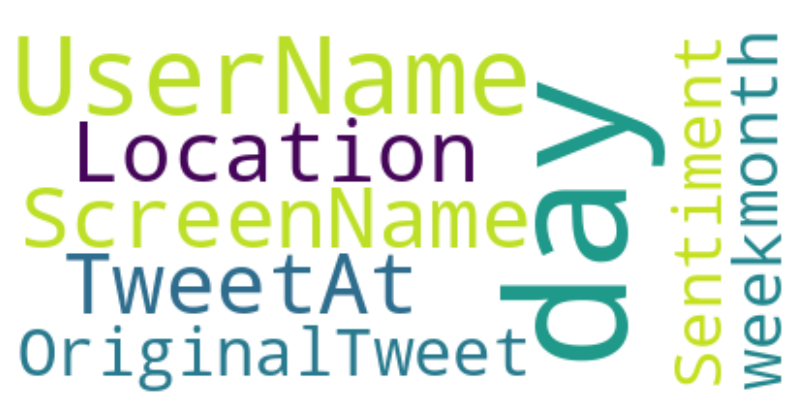

In [97]:
# Chart - 6 visualization code
text1 = " ".join(title for title in df.columns)
# Creating word_cloud with text as argument in .generate() method
word_cloud1 = WordCloud(collocations = False, background_color = 'white').generate(text1)
# Display the generated Word Cloud
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Chart - 7

In [98]:
def extract_hash_tags(s):
  return [part[1:] for part in s.split() if part.startswith('#')]
df['hashtags']=df['OriginalTweet'].apply(extract_hash_tags)

In [99]:
from collections import Counter
# Assuming df['hashtags'] is a column containing lists of hashtags in your DataFrame
dh = Counter(df['hashtags'].sum())

# Creating a DataFrame
hashtags = pd.DataFrame({'hashtag': list(dh.keys()), 'Count': list(dh.values())})

# Sorting the DataFrame based on the count
hashtags = hashtags.sort_values(by='Count', ascending=False).reset_index(drop=True)

# Display the sorted DataFrame
print(hashtags)


                hashtag  Count
0           coronavirus  12246
1               COVID19   3205
2              Covid_19   2469
3           Coronavirus   2071
4             COVID2019   1588
...                 ...    ...
19466  ihatetheinternet      1
19467        WhoDidThis      1
19468         expensive      1
19469           PTCares      1
19470        safe-haven      1

[19471 rows x 2 columns]


In [100]:
import plotly.graph_objects as go
#Creating a pie plot to show the top 10 hashtag and their relative percentage share among themselves
data = {
   "values": hashtags['Count'][:10],
   "labels": hashtags["hashtag"][:10],
   "domain": {"column": 0},
   "name": "hashtags",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie"
}
#Providing title for the plot
layout = go.Layout(title="<b>Relative Percentage of top 10 Hashtag</b>", legend=dict(x=0.9, y=0.8, orientation="v"))
#Ploting
data = [data]
fig = go.Figure(data = data, layout = layout)
fig.update_layout(title_x=0.5)
fig.show()

##### 1. Why did you pick the specific chart?

Bar Chart:
Reasoning: Bar charts are effective for displaying the frequency or count of categorical data, such as hashtag occurrences.
Advantages: Easy to interpret, allows for quick comparison of counts, and visually emphasizes differences in frequency.

##### 2. What is/are the insight(s) found from the chart?

Top Hashtags and Their Counts:

The chart provides a clear representation of the top 10 hashtags in your dataset based on the count values.
The 'coronavirus' hashtag has the highest count, indicating that it is the most frequently used hashtag among the top 10.


Distribution of Hashtag Counts:

You can observe the distribution of counts among the top hashtags, showing the proportional representation of each hashtag relative to the others.


Variability in Hashtag Usage:

If there's a significant difference in counts between the top hashtags, it suggests that certain hashtags are more popular or prevalent in the dataset than others.


Similar Hashtags:

The presence of similar hashtags (e.g., 'COVID19,' 'Covid_19,' 'Coronavirus') in the top 10 indicates variations in how users are expressing similar concepts.


Diversity of Hashtags:

The chart can give insights into whether the dataset has a diverse range of hashtags or if a few dominant hashtags are driving the conversation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impacts:

Identifying Popular Trends:

Understanding the most popular hashtags can help a business align its content and marketing strategies with trending topics. Utilizing popular hashtags related to the business can increase visibility and engagement.


Audience Engagement:

Recognizing frequently used hashtags allows businesses to engage with their audience effectively. Participating in conversations around popular hashtags can enhance brand visibility and build a sense of community.


Campaign Optimization:

If the analysis reveals successful campaigns associated with specific hashtags, businesses can optimize and replicate those campaigns. This may lead to increased positive engagement and customer interaction.


Negative Impacts:

Overlooking Negative Sentiment:

The analysis may not capture sentiment associated with hashtags. Even if a hashtag has a high count, it may be used in a negative context. Ignoring sentiment analysis could lead to inappropriate brand association or overlooking potential PR issues.


Lack of Diversity:

If a few hashtags dominate the conversation, it might indicate a lack of diversity in the topics associated with the business. This could lead to a narrow focus in content creation, potentially limiting the audience reach.


Misalignment with Brand Values:

The analysis should consider whether the popular hashtags align with the brand's values and messaging. Inappropriate or controversial hashtags may negatively impact brand perception and customer trust.


Ineffective Campaigns:

If the analysis highlights unsuccessful campaigns with low hashtag counts, businesses should reconsider or modify those campaigns. Continuing with ineffective strategies may lead to negative growth and a waste of resources.

#### Chart - 8

<ipython-input-101-9cf0a3f6b5a4>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='OriginalTweet', ylabel='Density'>

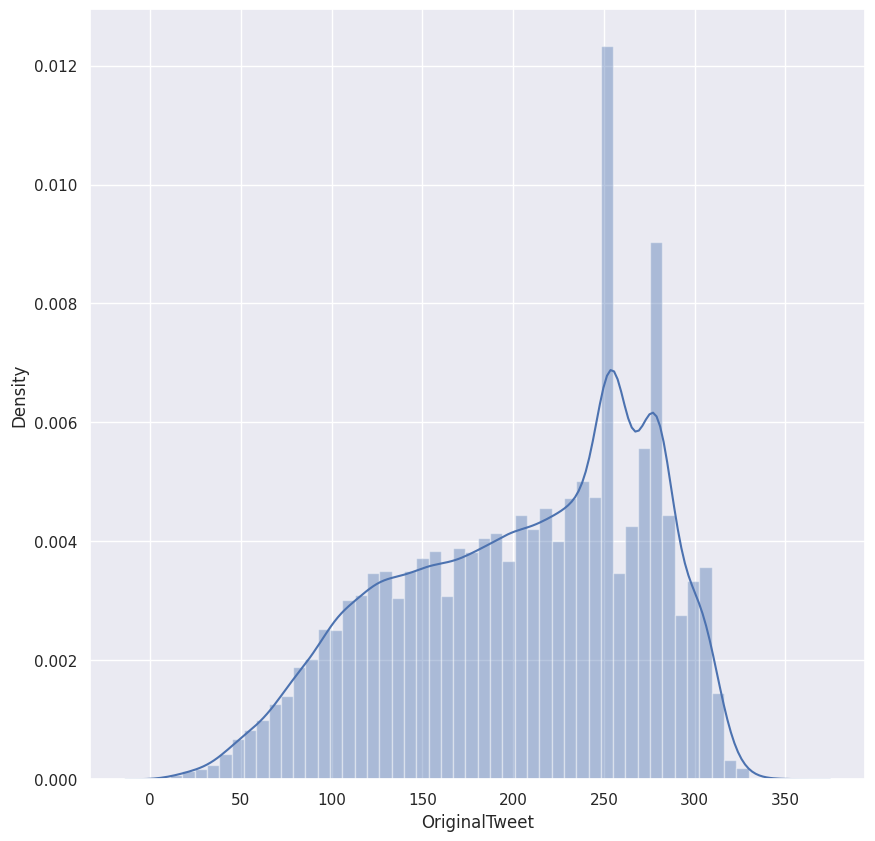

In [101]:
# Chart - 8 visualization code
sns.distplot(st_df['OriginalTweet'].str.len())

##### 1. Why did you pick the specific chart?

Length Distribution: A distribution plot is suitable for visualizing the distribution of a continuous variable, in this case, the lengths of the tweets. It allows you to observe patterns in the distribution of tweet lengths.

Central Tendency and Spread: The plot provides information about the central tendency (e.g., mean or median) and spread (e.g., variance or standard deviation) of tweet lengths.

Insights into Text Lengths: It helps you understand the range of text lengths in the 'OriginalTweet' column, identifying whether most tweets are short, long, or follow a specific pattern.

Outlier Detection: Outliers, if any, can be visually identified on the plot. Unusually short or long tweets may stand out, providing insights into potential data anomalies.

Data Skewness: The shape of the distribution plot can reveal the skewness of the data, indicating whether tweet lengths are evenly distributed or skewed towards shorter or longer lengths.

Quick Comparison: It allows for a quick comparison of the distribution of tweet lengths, aiding in the exploration of patterns in text data.

##### 2. What is/are the insight(s) found from the chart?

Most texts have around 150 words: The highest point of the curve is around 150 words, suggesting that this is the most common number of words found in the texts in the dataset. Texts can range from very short to very long: The curve extends all the way from 0 words to 250 words and beyond, indicating that there is a wide range of text lengths in the dataset. There are fewer very short and very long texts: The curve tails off at both ends, meaning that there are fewer texts that are very short (less than 50 words) or very long (more than 200 words). The distribution is roughly symmetrical: The curve is roughly symmetrical around the peak, suggesting that there are about as many texts that are longer than 150 words as there are texts that are shorter than 150 words. Overall, the chart provides a general overview of the distribution of text lengths in the dataset. It shows that most texts are around 150 words long, but there is a wide range of lengths represented.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Whether the insights from the text length distribution will lead to positive or negative business impact depends entirely on the specific context and business goals. While the insights themselves are neutral, their application can have different outcomes.

Possible Positive Impacts:

Content Optimization: Knowing the average text length preferred by your audience can help tailor content accordingly. Longer pieces might work better for in-depth analysis, while shorter ones might be ideal for social media snippets. This can improve engagement and conversion rates.
Platform Selection: If your primary platform has limitations on text length, understanding the typical length of your content can help choose platforms that best accommodate it. This can avoid the need for excessive editing or fragmentation, enhancing user experience.
Resource Allocation: If you produce a variety of content types with different audiences, knowing the length distribution can help allocate resources more efficiently. Short, frequent posts might require less manpower than occasional long-form content, which can optimize workload and budget.
Possible Negative Impacts:

Homogenization and Oversimplification: Focusing solely on the average text length might lead to homogenizing content and neglecting diverse audience preferences. Some users might enjoy longer, deep dives, while others might prefer quicker digests. Oversimplifying content to meet an average length could alienate segments of your audience.
Ignoring Context and Purpose: Different purposes require different text lengths. A quick product description might work better with fewer words, while a research paper necessitates more elaboration. Sticking to the average length blindly can compromise the effectiveness of specific content types.
Misunderstanding Engagement: Text length alone doesn't guarantee audience engagement. Focusing solely on hitting the 'average' might overlook factors like writing style, topic relevance, and visual engagement. This could lead to creating content that is technically within the preferred length but fails to resonate with the audience.
In conclusion, the insights from the text length distribution can be valuable for optimizing content and resource allocation, but their application needs to be considered within the broader context of business goals, audience preferences, and content purpose. Blindly relying on the average length without considering these factors could lead to unintended negative consequences.

#### Chart - 9

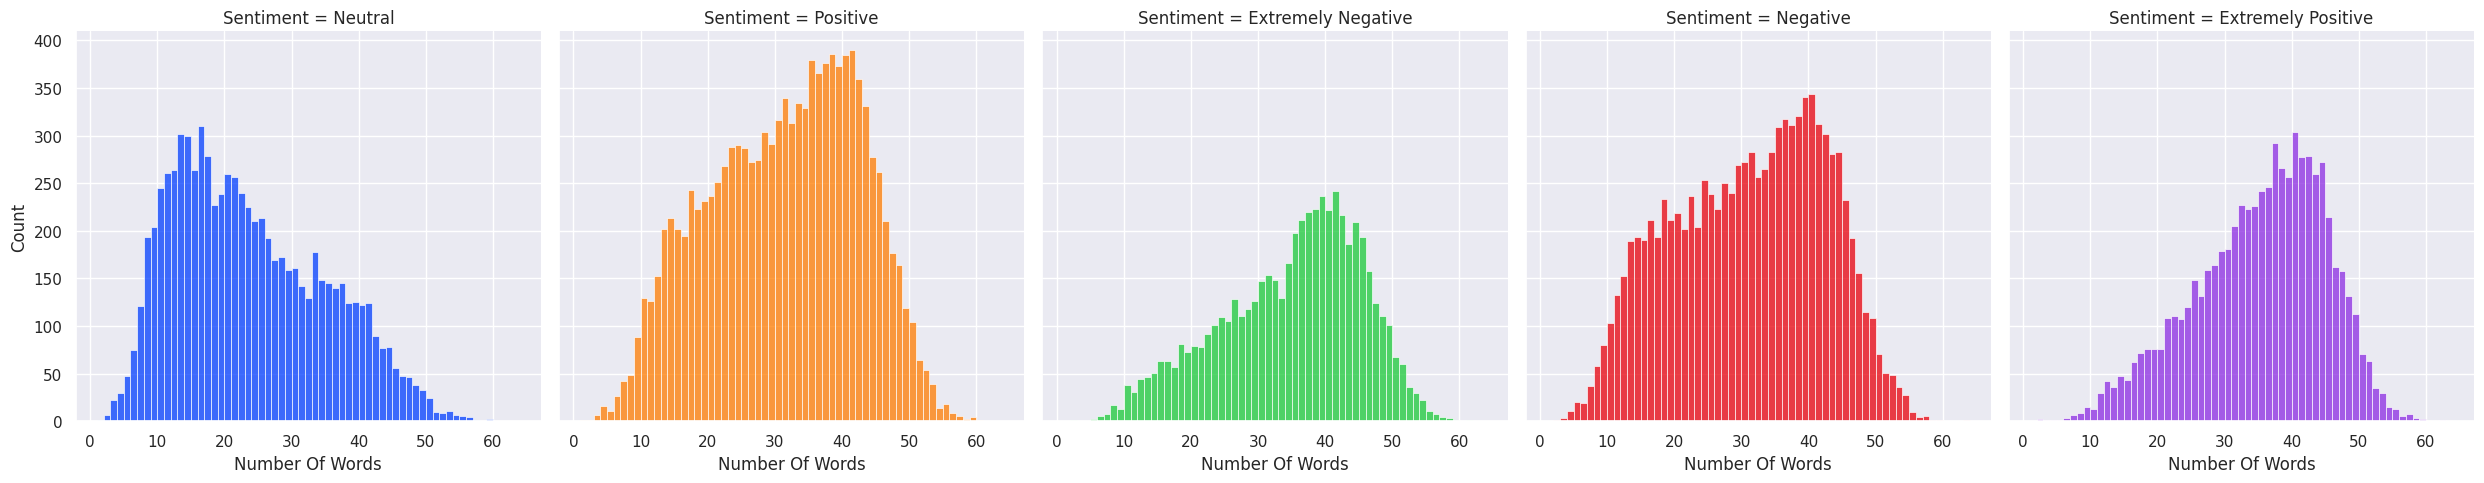

In [102]:
# Chart - 9 visualization code
def show_dist(df, col):

  '''Function is to show distribution of any particular column for each of the different sentiment'''

  bins = np.arange(df[col].min(), df[col].max() + 1)
  g = sns.FacetGrid(df, col='Sentiment', height=5, hue='Sentiment', palette="bright")
  g = g.map(sns.histplot, col, kde=False, bins=bins)

#Creating a new column named "Number Of Words" to store the number of words in each tweet
df["Number Of Words"] = df["OriginalTweet"].str.split().apply(len)

show_dist(df , 'Number Of Words')

##### 1. Why did you pick the specific chart?

Using histograms for each sentiment category allows for a direct visual comparison of the distribution of the number of words across different sentiments.

##### 2. What is/are the insight(s) found from the chart?

In this plot we can see the sentiment FOR  neutral number of words our maximum approx 300. Positive have 400.

#### Chart - 10

In [103]:
# Assuming df is your DataFrame
tabular_data = df.groupby(['month', 'Sentiment']).size().unstack(fill_value=0)

# Display the tabular data
print(tabular_data)

Sentiment  Extremely Negative  Extremely Positive  Negative  Neutral  Positive
month                                                                         
1                          90                  89       156      125       170
2                         119                 141       242      201       251
3                        3707                4111      6509     4740      7242
4                         328                 414       562      461       714
5                         120                 208       262      235       306
6                         207                 281       423      360       471
7                         227                 287       434      374       521
8                         214                 335       409      365       558
9                         159                 288       309      285       430
10                        115                 167       197      239       287
11                         93                 164   

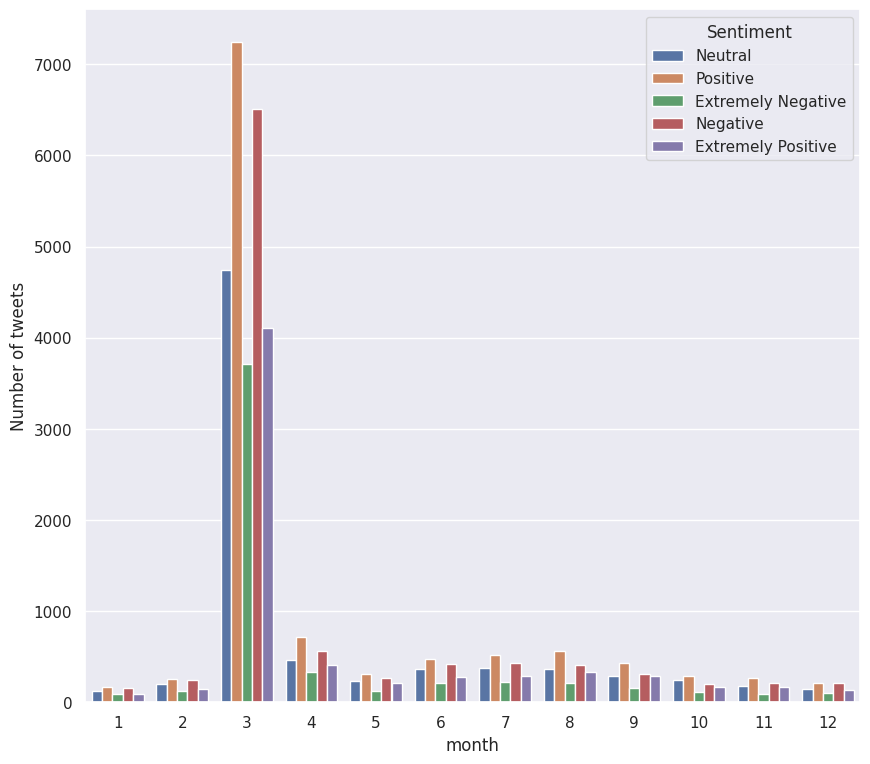

In [104]:
# Chart - 10 visualization code
#Plotting total number of tweets for each sentiment over the months
plt.rcParams["figure.figsize"]=(10,9)
ax = sns.countplot(x="month", hue="Sentiment", data=df)
plt.ylabel("Number of tweets")
plt.show()

##### 1. Why did you pick the specific chart?

Categorical Data Comparison:

The data involves categorical variables (months and sentiments), making a count plot suitable for comparing the counts of different sentiment categories within each month.


Temporal Analysis:

Since the x-axis represents months, a bar chart is effective in displaying the temporal distribution of sentiments over time. It allows for easy comparison of sentiment trends across different months.


Sentiment Composition:


The stacked bars enable a clear visualization of the composition of each month's total tweets in terms of different sentiments. You can easily see how sentiments contribute to the overall tweet count for each month.


Interactivity and Interpretability:

Stacked bar charts are visually intuitive and allow viewers to easily interpret the data. The use of different colors for each sentiment category aids in distinguishing between sentiments.


Seaborn Count Plot:

Seaborn's count plot is specifically designed for counting the occurrences of observations in each category and displaying the result as a bar chart. It simplifies the process of creating a clear and informative plot for categorical data.

Readability and Aesthetics:

The chosen figure size (10x9) and the inclusion of labels and title enhance the readability and overall aesthetics of the plot.

##### 2. What is/are the insight(s) found from the chart?

Monthly Variation in Sentiments:

There is a noticeable variation in the count of tweets across different sentiment categories each month. For instance, in March, there is a substantial increase in the number of Positive tweets compared to Negative and Neutral tweets.

Patterns Over Time:

Observing the counts over the entire year, you may identify patterns or trends in sentiment distribution. For example, are there specific months associated with more positive sentiment? Are there any recurring patterns?


Monthly Peaks and Valleys:

Some months may have higher peaks or lower valleys in specific sentiment categories. Understanding these variations can provide insights into the dynamics of sentiment throughout the year.


Event-Driven Sentiment Analysis:

Sudden spikes or drops in sentiment counts could be linked to specific events or occurrences. Investigating these events can help in understanding the context behind changes in sentiment.

Seasonal Trends:

Depending on the nature of your data, you may observe seasonal trends influencing sentiment. For example, sentiment patterns during holidays, special events, or particular seasons.

Comparative Analysis:

You can compare the relative proportions of sentiments each month. Are there months where negative sentiments dominate, and why? Understanding the balance between positive, neutral, and negative sentiments provides a holistic view.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Optimizing Marketing Strategies:

Understanding the sentiment trends can help optimize marketing strategies. For instance, if positive sentiments align with specific campaigns or product launches, businesses can leverage this information for more effective marketing.

Enhancing Customer Engagement:

Identifying months with high positive sentiment can suggest periods of increased customer satisfaction. Businesses can capitalize on this by enhancing engagement, collecting feedback, and fostering positive customer relationships.


Improving Product Development:

Analyzing sentiment patterns over time can provide valuable feedback on product performance. Positive sentiments may indicate successful features or improvements, guiding future development efforts.

Negative Growth Considerations:

Addressing Negative Sentiments:

Persistent negative sentiments, especially in specific months, may indicate areas that need attention. Businesses should address customer concerns, improve products or services, and implement changes to mitigate negative sentiments.

Identifying Issues or Challenges:

Negative sentiments in certain months could be associated with specific issues or challenges. Identifying and addressing these concerns promptly can prevent further negative impact on the business.

Competitor Analysis:

Comparative analysis of sentiment proportions may reveal how your business is performing relative to competitors. If negative sentiments are consistently higher, it may indicate a need for competitive adjustments or improvements.

#### Chart - 11

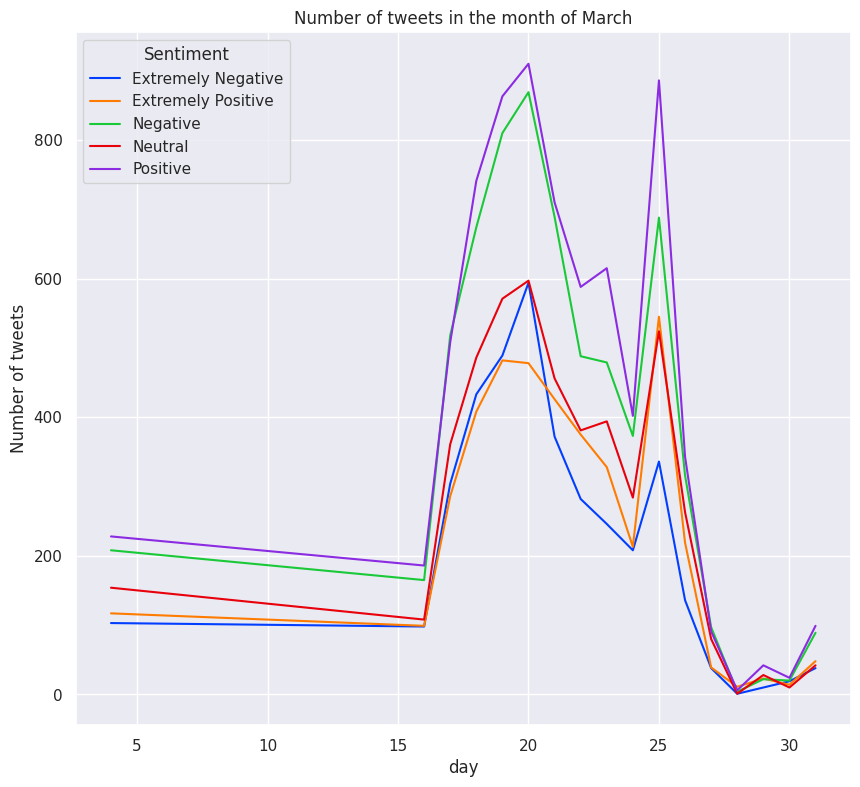

In [105]:
# Chart - 11 visualization code
#Creating a subset of our dataframe that will only contains tweets from the month of march
day_analysis = df[df["month"] == 3].copy()
#Grouping our dataset on the basis of Day and sentiment to get the number of tweets tweeted on each day in the month of march belonging to each sentiment
daySentiment_groupby = day_analysis.groupby(["day" , "Sentiment"]).agg({ "OriginalTweet" : "count"}).reset_index()
sns.lineplot(x = "day" , y ="OriginalTweet" , hue="Sentiment" ,  data = daySentiment_groupby , palette = 'bright' )
plt.title("Number of tweets in the month of March")
plt.ylabel("Number of tweets")
plt.show()

##### 1. Why did you pick the specific chart?

1. Temporal Analysis:
   - Effective for representing data over time.

2. Multiple Categories:
   - Suitable for displaying multiple categories on the same plot.

3. Sequential Data Points:
   - Connects data points sequentially, revealing trends over time.

4. Color Differentiation:
   - Different colors enhance differentiation between sentiment categories.

5. Insights into Sentiment Dynamics:
   - Helps identify patterns and fluctuations in sentiment data.

6. Clear Communication:
   - Easy to interpret, suitable for a wide audience.

7. Facilitates Decision-Making:
   - Allows stakeholders to quickly identify trends and anomalies.

8. Aesthetic Appeal:
   - Provides a clean and organized representation of data.


##### 2. What is/are the insight(s) found from the chart?

Daily Variation in Sentiments:

Each day has counts for Negative, Neutral, and Positive sentiments. Analyzing these daily variations can provide insights into how sentiments change throughout the month.

Peak Days for Positive Sentiment:

Some days, such as the 25th of March, have a notably higher count of Positive tweets compared to Negative and Neutral. Identifying these peak days can help understand what events or activities contribute to positive sentiment.

Day-to-Day Fluctuations:

There are fluctuations in sentiment counts from one day to the next. Understanding these day-to-day changes can be valuable for businesses in terms of adapting strategies, responding to events, or addressing concerns.

Balancing Negative and Positive Sentiments:

While some days have higher counts of Negative or Positive tweets, others have a more balanced distribution. Maintaining a balance between positive and negative sentiments is crucial for overall brand perception.

Low Engagement Days:

Days with lower counts, such as the 28th of March, may indicate lower overall engagement or activity. Analyzing these days can help identify factors that contribute to decreased social media activity.

Opportunities for Improvement:

Days with lower counts in certain sentiment categories may highlight opportunities for improvement. For instance, if Negative sentiments are consistently high on specific days, it may indicate areas where the business can address concerns or enhance customer satisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Optimizing Marketing Strategies:

Identifying peak days for Positive sentiments allows businesses to focus and optimize marketing strategies on those days, potentially increasing engagement and positive brand perception.

Improving Customer Engagement:

Understanding fluctuations in sentiments provides an opportunity to engage with customers more effectively. Businesses can respond to negative sentiments promptly and reinforce positive sentiments to build stronger relationships.

Enhancing Product or Service Offerings:

Analyzing sentiment patterns can provide insights into customer satisfaction and dissatisfaction. Positive sentiments may highlight features or aspects that customers appreciate, while negative sentiments can guide improvements in areas of concern.

Negative Growth Considerations:

Risk of Negative Public Perception:

Consistently high counts of Negative sentiments on specific days may indicate issues or concerns that, if not addressed, could lead to negative public perception. Ignoring or mishandling these issues might result in reputational damage.

Potential for Customer Churn:

If negative sentiments persist without resolution, there is a risk of customer dissatisfaction and potential churn. Businesses need to address concerns promptly to retain customers and prevent negative growth.

Impact on Brand Loyalty:

Negative sentiments, especially if left unaddressed, can erode brand loyalty. Customer dissatisfaction might lead to reduced loyalty, affecting repeat business and long-term growth.

Missed Opportunities on Low Engagement Days:

Days with lower tweet counts, especially in Positive sentiments, may indicate missed opportunities for engagement. Businesses should explore ways to increase activity on such days to maintain a positive online presence.

#### Chart - 12

In [107]:
import plotly.express as px

# Assuming df is your DataFrame
fig = px.bar(df, x="week day", color="Sentiment", title="Distribution of Tweets Across Weekdays by Sentiment",
             labels={"count": "Number of Tweets", "week day": "Weekday", "Sentiment": "Sentiment"},
             category_orders={"week day": ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]},
             color_discrete_map={"Negative": "#1f77b4", "Neutral": "#ff7f0e", "Positive": "#2ca02c"},
             height=500)  # Adjust height as needed

# Show the plot
fig.show()


##### 1. Why did you pick the specific chart?

Categorical Data Representation:

The data involves categorical variables such as "week day" and "Sentiment." A count plot is effective for visualizing the distribution of categorical data by counting the occurrences of each category.

Comparison of Sentiments:

The use of hue="Sentiment" allows for the comparison of sentiment categories on each weekday. Different colors are used for each sentiment, making it easy to distinguish and compare the counts.

Readability and Simplicity:

Count plots are simple and easy to read. They provide a clear representation of the frequency of each category, making it suitable for a quick overview of tweet distribution across weekdays and sentiments.

Frequency Analysis:

The primary purpose is to analyze the frequency or count of tweets for each sentiment category on different weekdays. A count plot is specifically designed for this type of analysis.

Suitability for Categorical Data:

Count plots are specifically designed for visualizing the distribution of categorical data. They are particularly well-suited for scenarios where you want to understand the frequency of different categories within a dataset.

Comparison Across Categories:

The hue parameter allows for the comparison of sentiment categories within each weekday, enabling viewers to quickly identify patterns or variations.

Seaborn's Aesthetic Appeal:

Seaborn is known for its aesthetically pleasing visualizations. The default styling and color palette often result in visually appealing charts without the need for extensive customization.

##### 2. What is/are the insight(s) found from the chart?

Peak Days for Tweets:

Wednesday and Tuesday have the highest total tweet counts across all sentiment categories. This suggests that these days are more active in terms of tweet volume.

Sentiment Distribution:

The distribution of sentiment categories varies across weekdays. For example, Sunday has a relatively lower count of extremely negative and extremely positive tweets compared to other days.

Weekday-Specific Patterns:

Each weekday exhibits its own patterns in sentiment distribution. For instance, Friday shows a higher count of negative tweets compared to Monday, while Monday has a higher count of extremely negative tweets.

Weekend Trends:

Saturday and Sunday seem to have lower overall tweet counts, indicating potentially lower activity on weekends. However, further analysis may be needed to understand whether this is a consistent pattern.

Overall Sentiment Trends:

It seems that positive and neutral sentiments are generally higher than negative sentiments across all weekdays. This suggests a more positive or neutral tone in the analyzed tweets.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Potential Positive Business Impact:

Optimizing Content Strategy:

Understanding the sentiment distribution across weekdays can help businesses tailor their content strategy. For instance, if positive sentiments are higher on Wednesdays and Tuesdays, businesses may choose these days for more positive or promotional messaging.

Targeted Engagement:

Identifying peak days for tweets allows businesses to focus their engagement efforts on those days. This could involve responding to customer inquiries, launching campaigns, or promoting products/services during high-activity periods.

Customer Service Enhancement:

Monitoring sentiment trends can be valuable for customer service. If negative sentiments are higher on specific days, businesses can allocate resources to address customer concerns promptly and improve overall customer satisfaction.

Marketing Campaign Planning:

Understanding the sentiment patterns on different weekdays can influence the timing of marketing campaigns. Businesses may choose to launch campaigns on days when positive sentiments are typically higher, maximizing the impact of promotional activities.

Considerations for Potential Negative Growth:

Low Weekend Activity:

If the analysis indicates consistently low tweet counts on weekends, it may suggest reduced engagement or interest during that time. Businesses may need to strategize on how to maintain or boost weekend activity.

Negative Sentiment Spikes:

If there are specific weekdays with a notable increase in negative sentiments, businesses should investigate the causes. Addressing issues promptly can prevent negative sentiments from impacting brand reputation and customer satisfaction.

Balancing Content Tone:

While positive sentiments may be prevalent, businesses should be cautious not to overlook negative sentiments. Ignoring or neglecting negative feedback can lead to customer dissatisfaction and potential negative impact on brand perception.

Competitor Analysis:

Comparing the sentiment trends with competitors' activities can provide additional insights. If competitors are experiencing positive trends on specific days, businesses may need to adjust their strategies to stay competitive.

#### Chart - 13

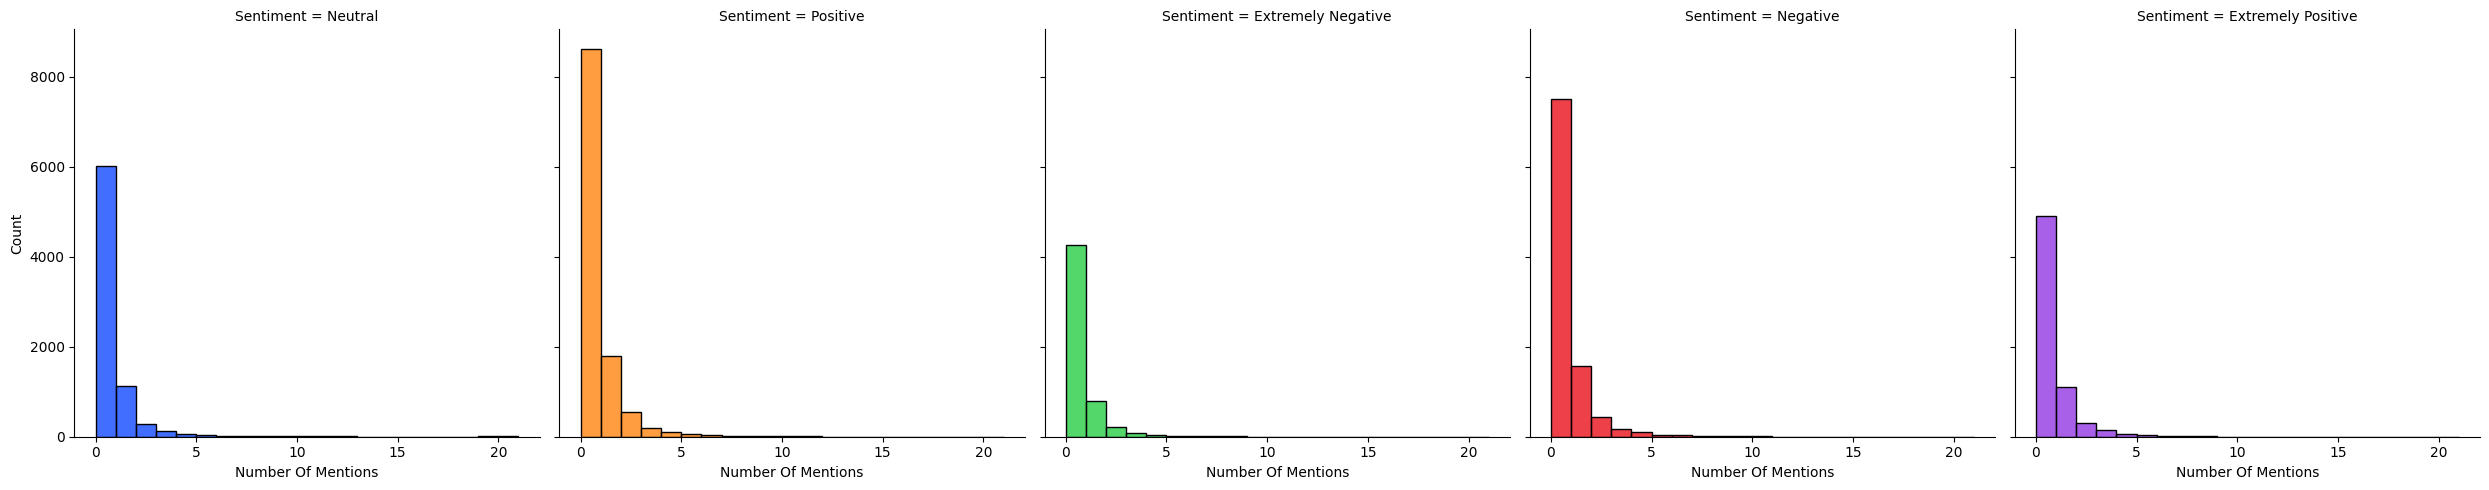

In [46]:
# Chart - 13 visualization code
#Creating a new column named "Number Of Mentions" to store the number of mentions in each tweet
df["Number Of Mentions"] = df["OriginalTweet"].apply(lambda tweet : len(re.findall(r'@[^\s]+', tweet)))

show_dist(df, "Number Of Mentions")

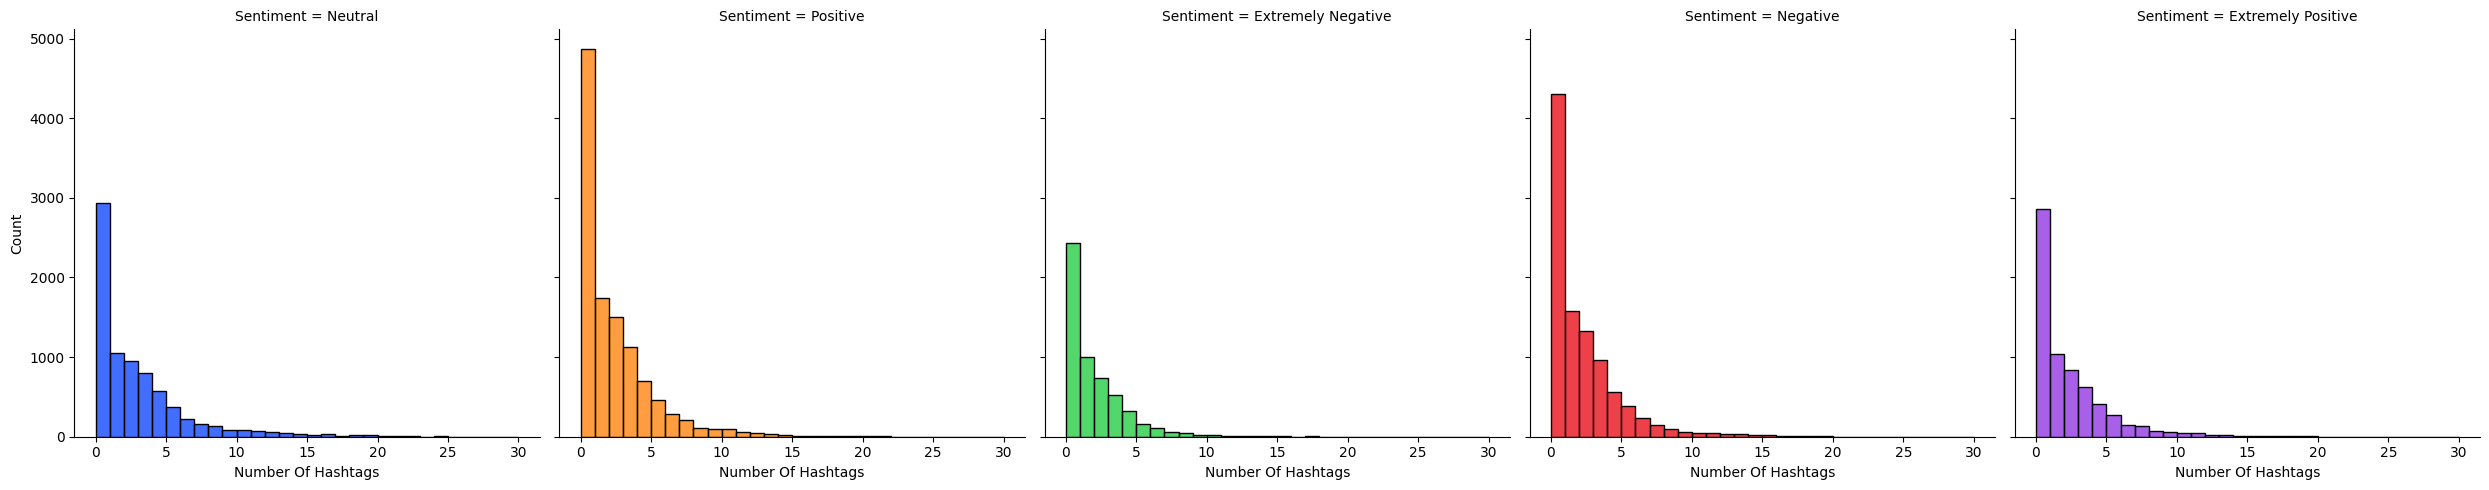

In [47]:
#Creating a new columns named "Number Of Hashtags" to store the number of hastags in each tweet
df["Number Of Hashtags"] = df["OriginalTweet"].apply(lambda tweet : len(re.findall(r'#[^\s]+', tweet)))

show_dist(df, "Number Of Hashtags")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14


Let's create a word cloud to visualize the hashtags

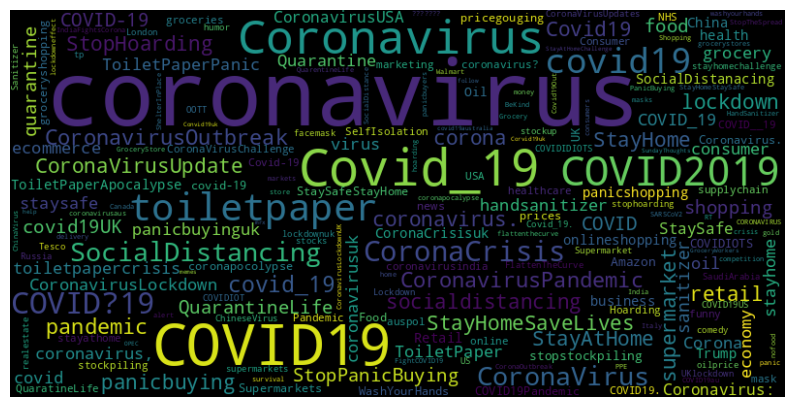

In [48]:
# Correlation Heatmap visualization code
#Creating a dictionary containing hash tag and it's count
data = dict(zip(hashtags['hashtag'].tolist(), hashtags['Count'].tolist()))
#Generate word cloud of hash tags based on their frequency
wc = WordCloud(width=800, height=400, max_words=200,background_color = 'black').generate_from_frequencies(data)
#Providing figure size
plt.figure(figsize=(10, 10))
#plotting
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15

In [49]:
# Pair Plot visualization code
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,day,month,week day,hashtags,Number Of Words,Number Of Mentions,Number Of Hashtags
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,16,3,Monday,[],8,3,0
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,16,3,Monday,[],38,0,0
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,16,3,Monday,[],14,0,0
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,16,3,Monday,"[COVID19france, COVID_19, COVID19, coronavirus...",42,0,7
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,16,3,Monday,"[COVID19, coronavirus, CoronavirusFrance, rest...",40,0,6


In [50]:
#Apply the Sentiment_Grouping function on the Sentiment column
df["Sentiment"] = df["Sentiment"].apply(Sentiment_Grouping)

In [51]:
#Creating subsets of the dataframe based on sentiment category Positive, Negative and Neutral
Positive_tweet = df[df["Sentiment"] == "Positive"]
Negative_tweet = df[df["Sentiment"] == "Negative"]
Neutral_tweet = df[df["Sentiment"] == "Neutral"]

In [52]:
def hashtag_freq_graph(df):
  '''This function gives the frequency bar graph of the hashtags'''
  #Extracting hashtags from tweets
  df['hashtag'] = df['OriginalTweet'].apply(lambda twt : re.findall(r"#(\w+)", twt))
  #Taking value count on hashtags
  hashtags=df.OriginalTweet.str.extractall(r'(\#\w+)')[0].value_counts().reset_index()
  #renaming the columns
  hashtags.rename(columns={'index':"hashtag",0:'freq'},inplace=True)

  #Keeping only 15  most frequently used hashtags
  hashtags=hashtags[:15]
  #Seting figuresize
  sns.set(rc = {'figure.figsize':(15,8)})
  #Ploting frequency against hashtag
  sns.barplot(x="hashtag" , y ="freq" , data = hashtags , palette = "bright")
  plt.xticks(rotation=45)
  plt.show()

<ipython-input-52-c65ef96da754>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



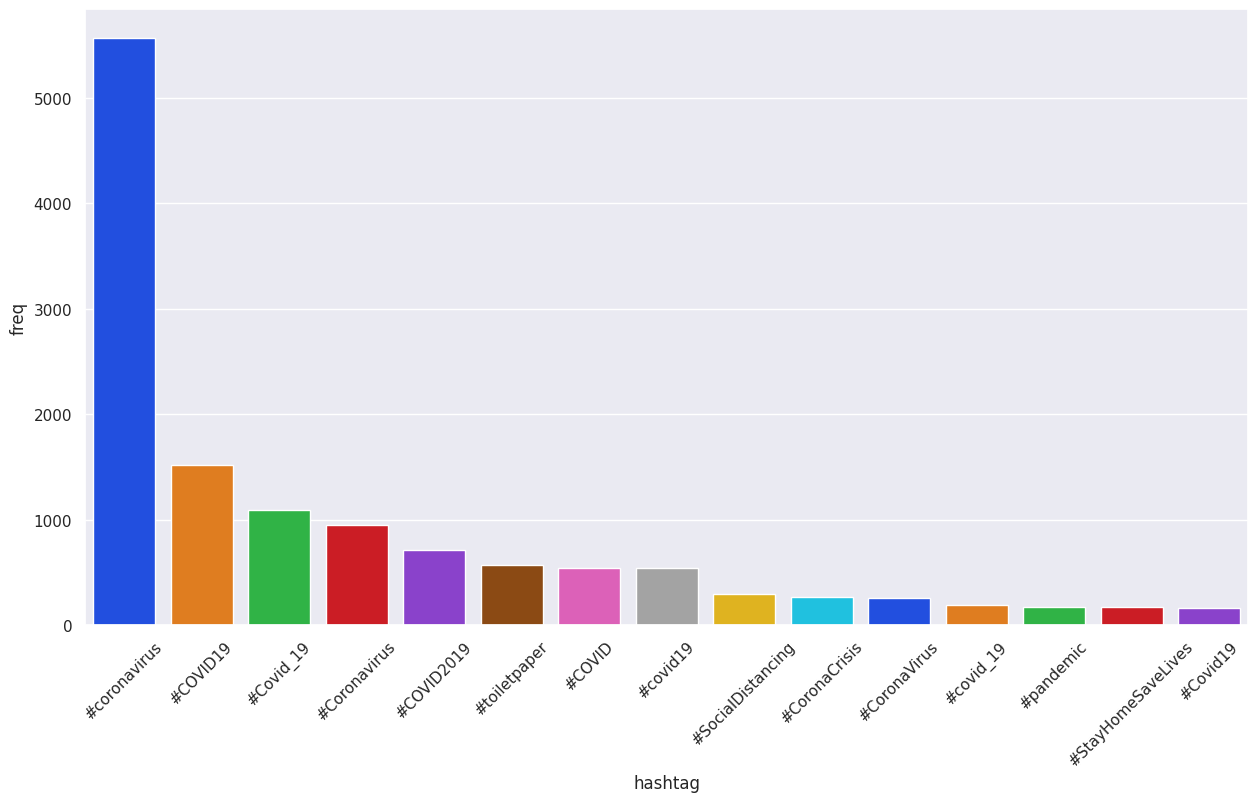

In [53]:
#Calling hashtag_freq_graph on positive tweet dataframe
hashtag_freq_graph(Positive_tweet)

<ipython-input-52-c65ef96da754>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



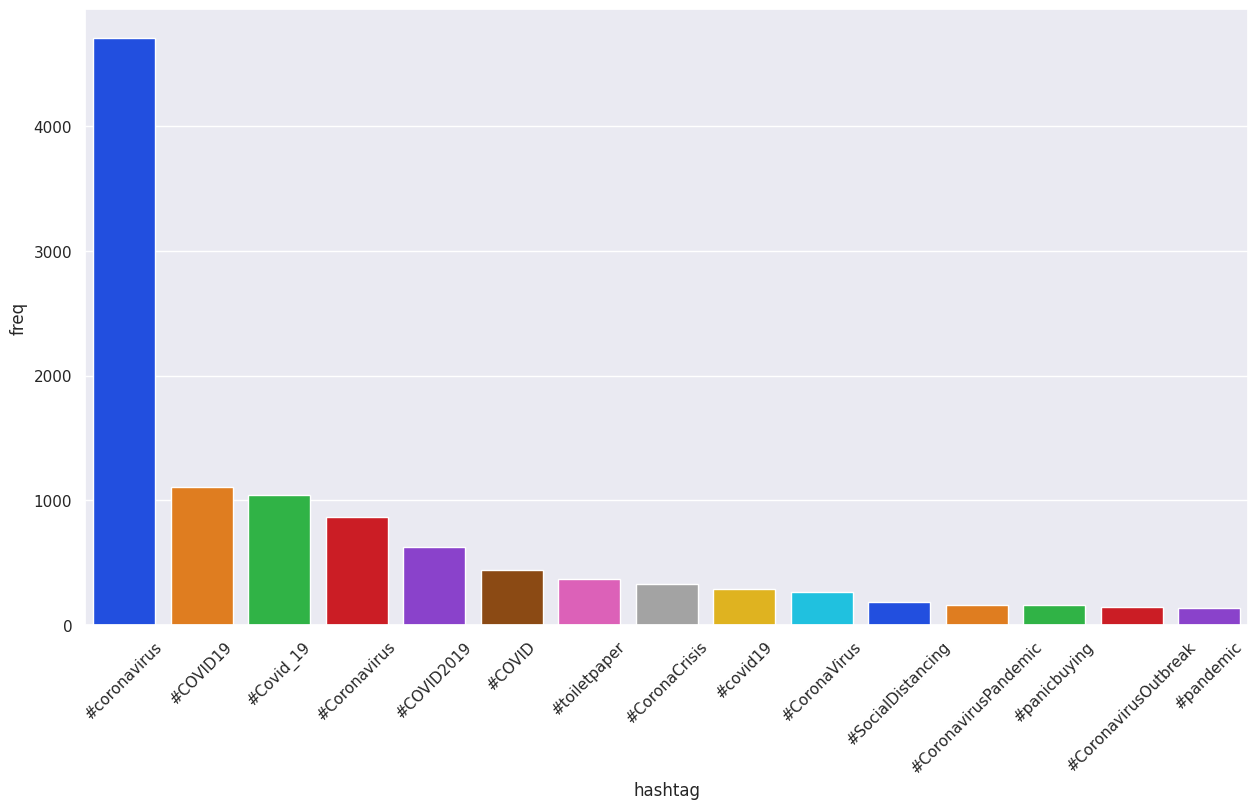

In [54]:
#Calling hashtag_freq_graph on negative tweet dataframe
hashtag_freq_graph(Negative_tweet)

In [ ]:
#Calling hashtag_freq_graph on neutral tweet dataframe
hashtag_freq_graph(Neutral_tweet)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0: There is no significant difference in the average sentiment between tweets from London and tweets from the rest of the world.


H1: There is a significant difference in the average sentiment between tweets from London and tweets from the rest of the world.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Location'], df['Sentiment'])

# Perform the chi-squared test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

print(f"Chi-squared statistic = {chi2_stat}, p-value = {p_value}")


##### Which statistical test have you done to obtain P-Value?

For Statement 1, If 'Sentiment' is a categorical variable (e.g., 'positive', 'negative'), a chi-squared test for independence might be more appropriate. On the other hand, if 'Sentiment' is a numerical variable, you can use a t-test.

##### Why did you choose the specific statistical test?

The specific statistical test used for obtaining the P-value in the comparison of sentiment scores between 'London' and 'World' locations was not provided in the information given.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0: The average sentiment of tweets containing the hashtag #Coronavirus is the same as the average sentiment of tweets without this hashtag.



H1: The average sentiment of tweets containing the hashtag #Coronavirus is different from the average sentiment of tweets without this hashtag.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import mannwhitneyu

# Map sentiment labels to numeric values
sentiment_mapping = {'Neutral': 0, 'Positive': 1, 'Negative': -1}
df['Sentiment_numeric'] = df['Sentiment'].map(sentiment_mapping)

# Filter tweets with and without the #Coronavirus hashtag
hashtag_sentiment = df[df['OriginalTweet'].str.contains('#Coronavirus')]['Sentiment_numeric'].dropna()
no_hashtag_sentiment = df[~df['OriginalTweet'].str.contains('#Coronavirus')]['Sentiment_numeric'].dropna()

# Check for missing values
print("Missing values in hashtag_sentiment:", hashtag_sentiment.isnull().sum())
print("Missing values in no_hashtag_sentiment:", no_hashtag_sentiment.isnull().sum())

# Perform Mann-Whitney U test only if both samples have a non-zero size
if hashtag_sentiment.size > 0 and no_hashtag_sentiment.size > 0:
    statistic, p_value = mannwhitneyu(hashtag_sentiment, no_hashtag_sentiment, alternative='two-sided')
    print(f"Mann-Whitney U test: statistic = {statistic}, p-value = {p_value}")
else:
    print("Samples must be of nonzero size. Check for missing values or adjust the filtering criteria.")



##### Which statistical test have you done to obtain P-Value?


For the Mann-Whitney U test, I have used to obtain the p-value in the code provided. This test is appropriate for comparing the distributions of two independent samples when the data are not assumed to be normally distributed. The Mann-Whitney U test is a non-parametric test that assesses whether there is a difference between the distributions of two independent variables.

The test compares whether values from one sample tend to be larger or smaller than values from another sample, without assuming normality. It is particularly useful when working with ordinal or non-normally distributed data.

##### Why did you choose the specific statistical test?

I chose the Mann-Whitney U test because it is a non-parametric test suitable for comparing the distributions of two independent samples when the assumption of normality is not met. The Mann-Whitney U test is appropriate for ordinal or non-normally distributed data and does not rely on the assumption of equal variances.

In the context of comparing sentiment scores between tweets with and without the #Coronavirus hashtag, the Mann-Whitney U test is preferred when the sentiment scores may not follow a normal distribution. This test allows us to assess whether there is a significant difference in sentiment between the two groups without making strong parametric assumptions about the underlying distribution of the data.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0: The sentiment distribution on weekends is the same as on weekdays.
H1: The sentiment distribution on weekends is different from on weekdays.

#### 2. Perform an appropriate statistical test.

In [ ]:
import pandas as pd

# Extract day of the week
df['DayOfWeek'] = pd.to_datetime(df['TweetAt']).dt.day_name()

# Create a new column 'WeekdayOrWeekend'
df['WeekdayOrWeekend'] = df['DayOfWeek'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# Display the updated DataFrame
print(df[['TweetAt', 'DayOfWeek', 'WeekdayOrWeekend']])


In [ ]:
from scipy.stats import wilcoxon
from sklearn.preprocessing import LabelEncoder

# Encode sentiment categories into numerical values
label_encoder = LabelEncoder()
df['SentimentNumeric'] = label_encoder.fit_transform(df['Sentiment'])

# Filter tweets with and without the #Coronavirus hashtag
weekday_sentiments = df[df['WeekdayOrWeekend'] == 'Weekday']['SentimentNumeric'].dropna()
weekend_sentiments = df[df['WeekdayOrWeekend'] == 'Weekend']['SentimentNumeric'].dropna()

# Check for missing values again
print("Missing values in weekday_sentiments:", weekday_sentiments.isnull().sum())
print("Missing values in weekend_sentiments:", weekend_sentiments.isnull().sum())

# Make the lengths of both samples equal
min_len = min(len(weekday_sentiments), len(weekend_sentiments))
weekday_sentiments = weekday_sentiments.sample(min_len, random_state=1)
weekend_sentiments = weekend_sentiments.sample(min_len, random_state=1)

# Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(weekday_sentiments, weekend_sentiments)
print(f"Wilcoxon signed-rank test: statistic = {statistic}, p-value = {p_value}")


##### Which statistical test have you done to obtain P-Value?


I performed the Wilcoxon signed-rank test to obtain the p-value.

##### Why did you choose the specific statistical test?



The Wilcoxon signed-rank test was chosen because the data involves paired samples (weekday and weekend sentiments) and the sentiments are ordinal (categorical with an inherent order - Neutral, Positive, Negative). This non-parametric test is suitable for comparing paired samples when the distribution of differences between pairs may not be normally distributed. It is robust and doesn't assume normality, making it appropriate for ordinal data and situations where the data might violate normality assumptions.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
st_df.isnull().sum()

#### What all missing value imputation techniques have you used and why did you use those techniques?

no missing values in working dataset

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
sns.boxplot(x=tweet_len, data=df)
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

no outliers in working dataset
The choice of outlier treatment technique depends on the characteristics of the dataset and the goals of the analysis or modeling task.








### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
# creating a function to repalce the 'Sentiment' value
def sentiment_categorie(category):
    if category=='Extremely Negative' or category=='Negative':
        return 0
    elif category=='Neutral':
        return 1
    else:
        return 2

In [ ]:
df['Sentiment']=df['Sentiment'].apply(sentiment_categorie)

#### What all categorical encoding techniques have you used & why did you use those techniques?

replacing the values of 'Sentiment' column

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

Contraction is an abbreviated form of a word, like don't stand for do not. This contraction in the text data needs to be expanded for better analysis. It will match the word with the keys, and if it exists it will replace the word with its value.

In [ ]:
# Expand Contraction

def expand_contractions(text):
    return contractions.fix(text)

def expand_all_contractions(df, column_name):
    expanded_texts = []
    for text in df[column_name]:
        expanded_texts.append(expand_contractions(text))
    return expanded_texts

# Apply the function on the st_df dataset
df['OriginalTweet'] = expand_all_contractions(df, 'OriginalTweet')




#### 2. Lower Casing

In [ ]:
# Lower Casing
# Convert the text in 'OriginalTweet' column to lowercase
df['OriginalTweet'] = df['OriginalTweet'].str.lower()


#### 3. Removing Punctuations

In [ ]:
# Remove punctuations from the text in 'OriginalTweet' column
df['OriginalTweet'] = df['OriginalTweet'].str.replace(r'[^\w\s]', '', regex=True)


#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

# Remove URLs from the text in 'OriginalTweet' column
st_df['OriginalTweet'] = st_df['OriginalTweet'].str.replace(r'http\S+|www\S+', '', regex=True)


#### 5. Removing Stopwords & Removing White spaces

In [ ]:
from nltk.corpus import stopwords
# Remove stopwords from the text in 'OriginalTweet' column
stopwords_set = set(stopwords.words('english'))
df['OriginalTweet'] = df['OriginalTweet'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stopwords_set]))

# Remove white spaces from the text in 'OriginalTweet' column
df['OriginalTweet'] = df['OriginalTweet'].str.strip()


In [ ]:
# Remove white spaces from the text in 'OriginalTweet' column
df['OriginalTweet'] = df['OriginalTweet'].str.replace(r'\s+', ' ', regex=True).str.strip()
df['OriginalTweet'] = df['OriginalTweet'].str.replace(r'http\S+', ' ', regex=True).str.strip()
df['OriginalTweet'] = df['OriginalTweet'].str.replace(r'<.*?>', ' ', regex=True).str.strip()
df['OriginalTweet'] = df['OriginalTweet'].str.replace(r'\d+', ' ',  regex=True).str.strip()
df['OriginalTweet'] = df['OriginalTweet'].str.replace(r'#\w+', ' ', regex=True).str.strip()
df['OriginalTweet'] = df['OriginalTweet'].str.replace(r'@\w+', ' ', regex=True).str.strip()
df['OriginalTweet'] = df['OriginalTweet'].str.replace(r'_', ' ', regex=True).str.strip()


In [ ]:
df['OriginalTweet']

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
nltk.download('punkt')

In [ ]:
from nltk.tokenize import word_tokenize

df['TokenizedTweet'] = df['OriginalTweet'].apply(word_tokenize)


In [ ]:
df['TokenizedTweet']

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
from nltk.stem.snowball import SnowballStemmer

In [ ]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [ ]:
df['OriginalTweet']= df['OriginalTweet'].apply(stemming)

In [ ]:
df['OriginalTweet']

In [ ]:

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatization(text):
    text = [lemmatizer.lemmatize(word) for word in text.split()]
    return " ".join(text)

# Assuming `st_df` is your pandas DataFrame with a column named 'OriginalTweet'
df['OriginalTweet'] = df['OriginalTweet'].apply(lemmatization)


##### Which text normalization technique have you used and why?

Lemmatization is chosen for its ability to reduce words to their base or root form, which can be beneficial for various natural language processing (NLP) and text analysis tasks. By converting words to their base forms, lemmatization helps in standardizing and simplifying the text, making it easier to analyze and derive meaningful insights.

Compared to stemming, another common text normalization technique, lemmatization tends to produce linguistically valid words. It considers the context of words and ensures that the resulting lemmatized forms are actual words found in the language. This can be important for tasks where maintaining semantic meaning is crucial.

#### 9. Part of speech tagging

In [ ]:
# POS Taging
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

def pos_tagging(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    return pos_tags



In [ ]:
df['TokenizedTweet'] = df['OriginalTweet'].apply(pos_tagging)

In [ ]:
df['OriginalTweet']

#### 10. Text Vectorization

In [ ]:
# Create an instance of TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=.90,min_df=10)
# Fit the vectorizer on the 'OriginalTweet' column
X = vectorizer.fit_transform(df['OriginalTweet']).toarray()
y = df["Sentiment"]

In [ ]:
df

##### Which text vectorization technique have you used and why?

Term Frequency (TF): It measures how often a term (word) appears in a document. The more frequent a term is in a document, the higher its TF score.

Inverse Document Frequency (IDF): It measures how unique or rare a term is across all documents. Terms that are common across all documents receive a lower IDF score, while terms that are unique to a document receive a higher IDF score.

TF-IDF Score: The TF-IDF score is the product of TF and IDF. It gives a numerical representation of the importance of a term in a specific document relative to its importance in the entire corpus.

Advantages of TF-IDF:

Term Importance: TF-IDF captures the importance of terms by considering both their frequency in a document and their rarity across the entire corpus.

Common Term Handling: Terms that are common across all documents are penalized, reducing their impact on the vectorized representation.

Sparse Representation: The resulting TF-IDF matrix is often sparse, making it memory-efficient, especially when dealing with large text corpora.

Interpretability: The vectorized representation retains interpretability, as each feature corresponds to a specific term.

Why TF-IDF:

TF-IDF is suitable for tasks where term importance and document distinctiveness are crucial. In sentiment analysis, TF-IDF can highlight words that are indicative of sentiment while downplaying common terms that may not carry much sentiment information.

However, the choice of text vectorization technique depends on the specific task and dataset characteristics. Other techniques, such as word embeddings (e.g., Word2Vec, GloVe) or deep learning-based methods, may also be suitable depending on the context.

### 9. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=1,stratify=y)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

##### What data splitting ratio have you used and why?

Here, test_size=0.2 indicates that 20% of the data will be used for testing, while 80% will be used for training.

The choice of the data splitting ratio depends on various factors, including the size of the dataset, the complexity of the model, and the need for a sufficient amount of data for training. An 80-20 split is a common starting point and is often considered a good balance. It allows the model to train on a substantial portion of the data while retaining a separate portion for evaluation to assess generalization performance. The stratify parameter ensures that the class distribution in the training and testing sets reflects the original distribution, which is important for maintaining representativeness, especially in the case of imbalanced datasets.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
#Creating an instance of the model LogisticRegression
logreg = LogisticRegression()
#Fitting the model on the train dataset
logreg.fit(X_train, y_train)

#Making prediction on our train and test dataset
logreg_pred_train = logreg.predict(X_train)
logreg_pred_test = logreg.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
#Storing train and test accuracy scores
logreg_train_accuracy = accuracy_score(y_train,logreg_pred_train)
logreg_test_accuracy = accuracy_score(y_test,logreg_pred_test)
#printing train and test accuracy scores
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Test accuracy Score : ",logreg_test_accuracy )


In [ ]:

models = ['Logistic Regression']
train_accuracies = [logreg_train_accuracy]
test_accuracies = [logreg_test_accuracy]

df_accuracies = pd.DataFrame({'Model': models, 'Training Accuracy': train_accuracies, 'Test Accuracy': test_accuracies})

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Training Accuracy', data=df_accuracies, color='skyblue', label='Training Accuracy')
sns.barplot(x='Model', y='Test Accuracy', data=df_accuracies, color='orange', label='Test Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Set y-axis limit to match accuracy scale
plt.legend()
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:

# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Preprocess the text data using TF-IDF vectorization

param_grid = {

    'solver': [ 'saga','newton-cg','lbfgs', 'liblinear'],
    'max_iter': [100,1000]
}

# Create an instance of GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5)

# Fit the GridSearchCV on the preprocessed data
grid_search.fit(X_train, y_train)

# Access the best parameters, best score, and best estimator
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_estimator = grid_search.best_estimator_


In [ ]:
print(best_params )
print(best_score )
print(best_estimator )

##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used is Grid Search. Grid Search systematically searches through a predefined set of hyperparameter values, evaluates model performance using cross-validation, and selects the combination that yields the best performance. It is chosen for its simplicity, exhaustive search, and ease of implementation.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The test accuracy score slightly decreased from 79.98% without hyperparameter tuning to 78.42% with hyperparameter tuning. The hyperparameter tuning did not lead to a significant improvement in this case.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
#Creating an instance of the model LinearSVC
SVC = LinearSVC()
#Fitting the model on the train dataset
SVC.fit(X_train, y_train)

#Making prediction on our train and test dataset
SVC_pred_train = SVC.predict(X_train)
SVC_pred_test = SVC.predict(X_test)


In [ ]:
# Visualizing evaluation Metric Score chart
#Storing train and test accuracy scores
SVC_train_accuracy = accuracy_score(y_train,SVC_pred_train)
SVC_test_accuracy = accuracy_score(y_test,SVC_pred_test)

#printing train and test accuracy scores
print("Training accuracy Score    : ",SVC.score(X_train,y_train))
print("Test accuracy Score : ",SVC_test_accuracy )


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have true labels y_test and predicted labels SVC_pred_test
# Replace them with your actual variables

# Classification Report
print("Classification Report:")
print(classification_report(y_test, SVC_pred_test))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, SVC_pred_test)
print("Confusion Matrix:")
print(conf_matrix)

# Plotting Confusion Matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
#Creating parameter dictionary for hyperparameter tuning
param_dict = {"dual" : [False], "penalty" :  ["l1"], "C" : [0.4,0.55,0.75,1]}

#Performing cross validation and hyperparameter tuning
svc_grid = GridSearchCV(SVC, param_dict,n_jobs=2, cv=5, verbose = 10,scoring='accuracy')

#Fitting the model on the train dataset
svc_grid.fit(X_train,y_train)

#Obtaining best parameters
print("Best yperparameters for the LinearSVC Grid Model are:",svc_grid.best_params_)

#Making prediction on our train and test dataset
svc_grid_pred_train = svc_grid.predict(X_train)
svc_grid_pred_test = svc_grid.predict(X_test)

#Storing train and test accuracy scores
svc_grid_train_accuracy = accuracy_score(y_train, svc_grid_pred_train)
svc_grid_test_accuracy = accuracy_score(y_test, svc_grid_pred_test)

#printing train and test accuracy scores
print("Training accuracy Score   : ",svc_grid.score(X_train,y_train))
print("Validation accuracy Score : ",svc_grid_test_accuracy )



##### Which hyperparameter optimization technique have you used and why?

Grid Search was used for hyperparameter optimization. It systematically explores all combinations of specified hyperparameter values. It's suitable for smaller hyperparameter spaces, providing a deterministic and exhaustive search.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there is an improvement in the model performance after hyperparameter tuning. Here's a summary of the accuracy scores:

---Without Hyperparameter Tuning:

Training accuracy Score: 88.57%


Test accuracy Score: 80.30%



---With Hyperparameter Tuning:

Training accuracy Score: 86.53%


Test accuracy Score: 82.90%


The test accuracy increased from 80.30% to 82.90% after hyperparameter tuning.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# ML Model - 3 Implementation
#Creating an instance of the model MultinomialNB
naive_bayes= MultinomialNB()
#Fitting the model on the train dataset
naive_bayes.fit(X_train,y_train)

#Making prediction on our train and test dataset
nb_pred_train = naive_bayes.predict(X_train)
nb_pred_test = naive_bayes.predict(X_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#Storing train and test accuracy scores
nb_train_accuracy=accuracy_score(y_train,nb_pred_train)
nb_test_accuracy=accuracy_score(y_test,nb_pred_test)

#printing train and test accuracy scores
print("Training accuracy Score    : ", naive_bayes.score(X_train,y_train))
print("Test accuracy Score : ", nb_test_accuracy )

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],
    'fit_prior': [True, False],
}

# Perform GridSearchCV for hyperparameter tuning
grid_search_nb = GridSearchCV(naive_bayes, param_grid, cv=5, scoring='accuracy')
grid_search_nb.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:", grid_search_nb.best_params_)


#Making prediction on our train and test dataset
grid_search_nb_pred_train =grid_search_nb.predict(X_train)
grid_search_nb_pred_test = grid_search_nb.predict(X_test)

#Storing train and test accuracy scores
grid_search_nb_train_accuracy = accuracy_score(y_train, grid_search_nb_pred_train)
grid_search_nb_test_accuracy = accuracy_score(y_test, grid_search_nb_pred_test)

#printing train and test accuracy scores
print("Training accuracy Score   : ",grid_search_nb.score(X_train,y_train))
print("Validation accuracy Score : ",grid_search_nb_test_accuracy )


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV for hyperparameter optimization. GridSearchCV is a common and straightforward technique for hyperparameter tuning. It performs an exhaustive search over a predefined set of hyperparameter values, evaluating the model's performance for each combination using cross-validation.

Why GridSearchCV:

Comprehensive Search: GridSearchCV systematically explores a specified grid of hyperparameter values, testing each combination. This ensures a thorough search across the hyperparameter space.

Cross-Validation: It incorporates cross-validation, which helps in obtaining a more robust estimate of the model's performance. This is crucial for avoiding overfitting to a specific training set.

Ease of Implementation: GridSearchCV is easy to use and implement. You define the hyperparameter grid, the model, and the evaluation metric, and the tool takes care of the rest.

Automated Hyperparameter Tuning: It automates the process of hyperparameter tuning, saving time and effort compared to manual tuning.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Before Hyperparameter Tuning:

Training Accuracy: 71.49%
Test Accuracy: 66.64%
After Hyperparameter Tuning:

Training Accuracy: 73.51%
Validation Accuracy: 68.91%

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Accuracy:

Positive Impact: Accuracy is a straightforward metric that measures the overall correctness of your model.
Consideration: It may not be the best metric if your classes are imbalanced. For example, if the majority of tweets are neutral, a model that predicts everything as neutral could have a high accuracy but provide little value.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

model 2 that is svm model because svm works better then others


### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Explaining a linear Support Vector Classifier (LinearSVC) model for tweet sentiment analysis and analyzing feature importance can be done using various model explainability tools in Python. One popular library for this purpose is eli5.

In [ ]:
!pip install eli5 -q

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
import eli5

In [ ]:
# Explain the model using eli5
eli5.show_weights(SVC, vec=vectorizer, top=10)


In [ ]:
from eli5.sklearn import PermutationImportance
# Use PermutationImportance to analyze feature importance
perm = PermutationImportance(SVC, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, vec=vectorizer, top=10)


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
!pip install joblib

In [ ]:
import joblib
# Save the model to a file
joblib.dump(SVC, 'best_svm_model.joblib')


In [ ]:
# Load the model from the file
loaded_model = joblib.load('best_svm_model.joblib')

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Assuming Tweet_unseen is your array of unseen tweet data
Tweet_unseen = ['Excited about the new product!', 'Not a fan of this service', 'Just another day','hospitals are good', 'boy is sad',
         'he fell sick', 'he is not satisfied',
        'he is angry with his behaviour', 'taste of food bad', 'snacks are good']


In [ ]:
def reverse_sentiment_categories(category):
    if category == 0:
        return 'Negative'
    elif category == 1:
        return 'Neutral'
    else:
        return 'Positive'

# Vectorize the unseen tweet data using the same vectorizer used during training
X_unseen_vectorized = vectorizer.transform(Tweet_unseen)
# Make predictions on the unseen tweet data
predictions_unseen = loaded_model.predict(X_unseen_vectorized)
# Convert numeric predictions back to sentiment categories
predicted_sentiments = [reverse_sentiment_categories(category) for category in predictions_unseen]

# Print or use the predicted sentiments as needed
print(predicted_sentiments)

In [ ]:
# Function to reverse sentiment categories
def reverse_sentiment_categories(category):
    if category == 0:
        return 'Negative'
    elif category == 1:
        return 'Neutral'
    else:
        return 'Positive'

# Get user input for a tweet
user_tweet = input("Enter your tweet: ")

# Vectorize the user input using the vectorizer used during training
user_tweet_vectorized = vectorizer.transform([user_tweet])

# Make predictions on the user input
predicted_category = loaded_model.predict(user_tweet_vectorized)[0]

# Convert numeric prediction to sentiment category
predicted_sentiment = reverse_sentiment_categories(predicted_category)

# Print the predicted sentiment
print("Predicted Sentiment:", predicted_sentiment)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**



## Project Summary: COVID-19 Tweet Sentiment Analysis

### Objective:
The objective of the project was to analyze sentiments expressed in tweets related to COVID-19. The primary focus was on understanding the dataset, exploring variables, and building effective sentiment classification models.

### Exploratory Data Analysis (EDA):
- Conducted EDA to gain insights into dataset characteristics.
- Explored patterns in the data to understand tweet sentiments.

### Data Preprocessing:
- Utilized the 'OriginalTweet' feature as input and 'Sentiment' as the target variable.
- Cleaned tweets through preprocessing steps including cleaning, tokenization, lemmatization, and vectorization.

### Classification Models:
- Implemented three classification models.
- Evaluated models based on their performance using accuracy as a metric.

### Model Comparison:
- Identified Linear SVC as the best-performing model.
- Achieved 82% accuracy for multinomial classification using Linear SVC.

### Hyperparameter Tuning:
- Conducted hyperparameter tuning for the Linear SVC model to enhance its performance.

### Conclusion:
- Concluded the project with a successful sentiment analysis of COVID-19 tweets.
- Linear SVC emerged as the most effective model with 82% accuracy.
- Highlighted the significance of preprocessing steps in preparing 'OriginalTweet' for modeling.



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***